<a href="https://colab.research.google.com/github/prajwalDU/customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

Importing python packages

In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
data = '/content/drive/MyDrive/almabetter/ML/customer segmentation/Online Retail.xlsx'

df = pd.read_excel(data)

In [4]:
# Check first 5 rows of dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
# Check last 5 rows of dataset
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [6]:
# Check the shape of dataset
df.shape

(541909, 8)

In [7]:
# Check the describe of dataset
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Check the duplicate values in our dataset

In [8]:
# Check the duplicates in dataset
len(df[df.duplicated()])

5268

We have 5268 duplicates values in our dataset we as to drop it before starting analysis

In [9]:
# Print the shape of dataset before removing duplicate
print('The shape of dataset before removing duplicate :', df.shape)

# Dropping duplicate
df.drop_duplicates(inplace=True)

# Print the shape of dataset after removing duplicate
print('The shape of dataset after removing duplicate :', df.shape)

The shape of dataset before removing duplicate : (541909, 8)
The shape of dataset after removing duplicate : (536641, 8)


Check the missing values in dataset with percentage

In [10]:
# Check the missing values
missing = df.columns[df.isnull().any()].tolist()

# Print the missing values in dataset
print('Missing Data count')
print(df[missing].isnull().sum().sort_index(ascending=False))
# Print the percentage of missing data
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_index(ascending=False)/len(df)*100,2))

Missing Data count
Description      1454
CustomerID     135037
dtype: int64
Missing Data Percentage
Description     0.27
CustomerID     25.16
dtype: float64


Dropping rows where customerID column contain null

In [11]:
# Dropping customerID where row with nulls
df.dropna(subset=['CustomerID'], inplace=True)

In [12]:
# Check shape of dataset
df.shape

(401604, 8)

In [13]:
# Check the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**Feature Engineering**

AS we seen above we have one datetime column we take new columns from that like date, month, year, hour

In [14]:
df['year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['month'] = df['InvoiceDate'].apply(lambda x : x.month_name())
df['day'] = df['InvoiceDate'].apply(lambda x : x.day_name())
df['hour'] = df['InvoiceDate'].apply(lambda x : x.hour)

creating another one feature total amount

In [15]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

Above we created hour columns for further analysis we divid time into 3 zone morning, afternoon and evening.

In [16]:
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [17]:
# Check cancellation using InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  year  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   

        month        day  hour  TotalAmount TimeType  
141  December  Wednesday     9       -27.50  Morning  
154  December  Wednesday     9        -4.65  Morning  
235  December  Wednesday    10       -19.80  Morning  
236  December  Wednesday    10        -6.96  Morning  
237  December  Wednesday    10        -6.96  Morning

In [18]:
# Check cancellations shape
cancellations.shape

(8872, 14)

We have total 401604 InvoiceNo in that we have 8872 cancellations data, so we has to drop it

In [19]:
# Drop the rows which contain 'C' in our main dataset
dt = df[~df['InvoiceNo'].str.contains('C')]

In [20]:
# Check our dataset shape
dt.shape

(392732, 14)

# **EDA**

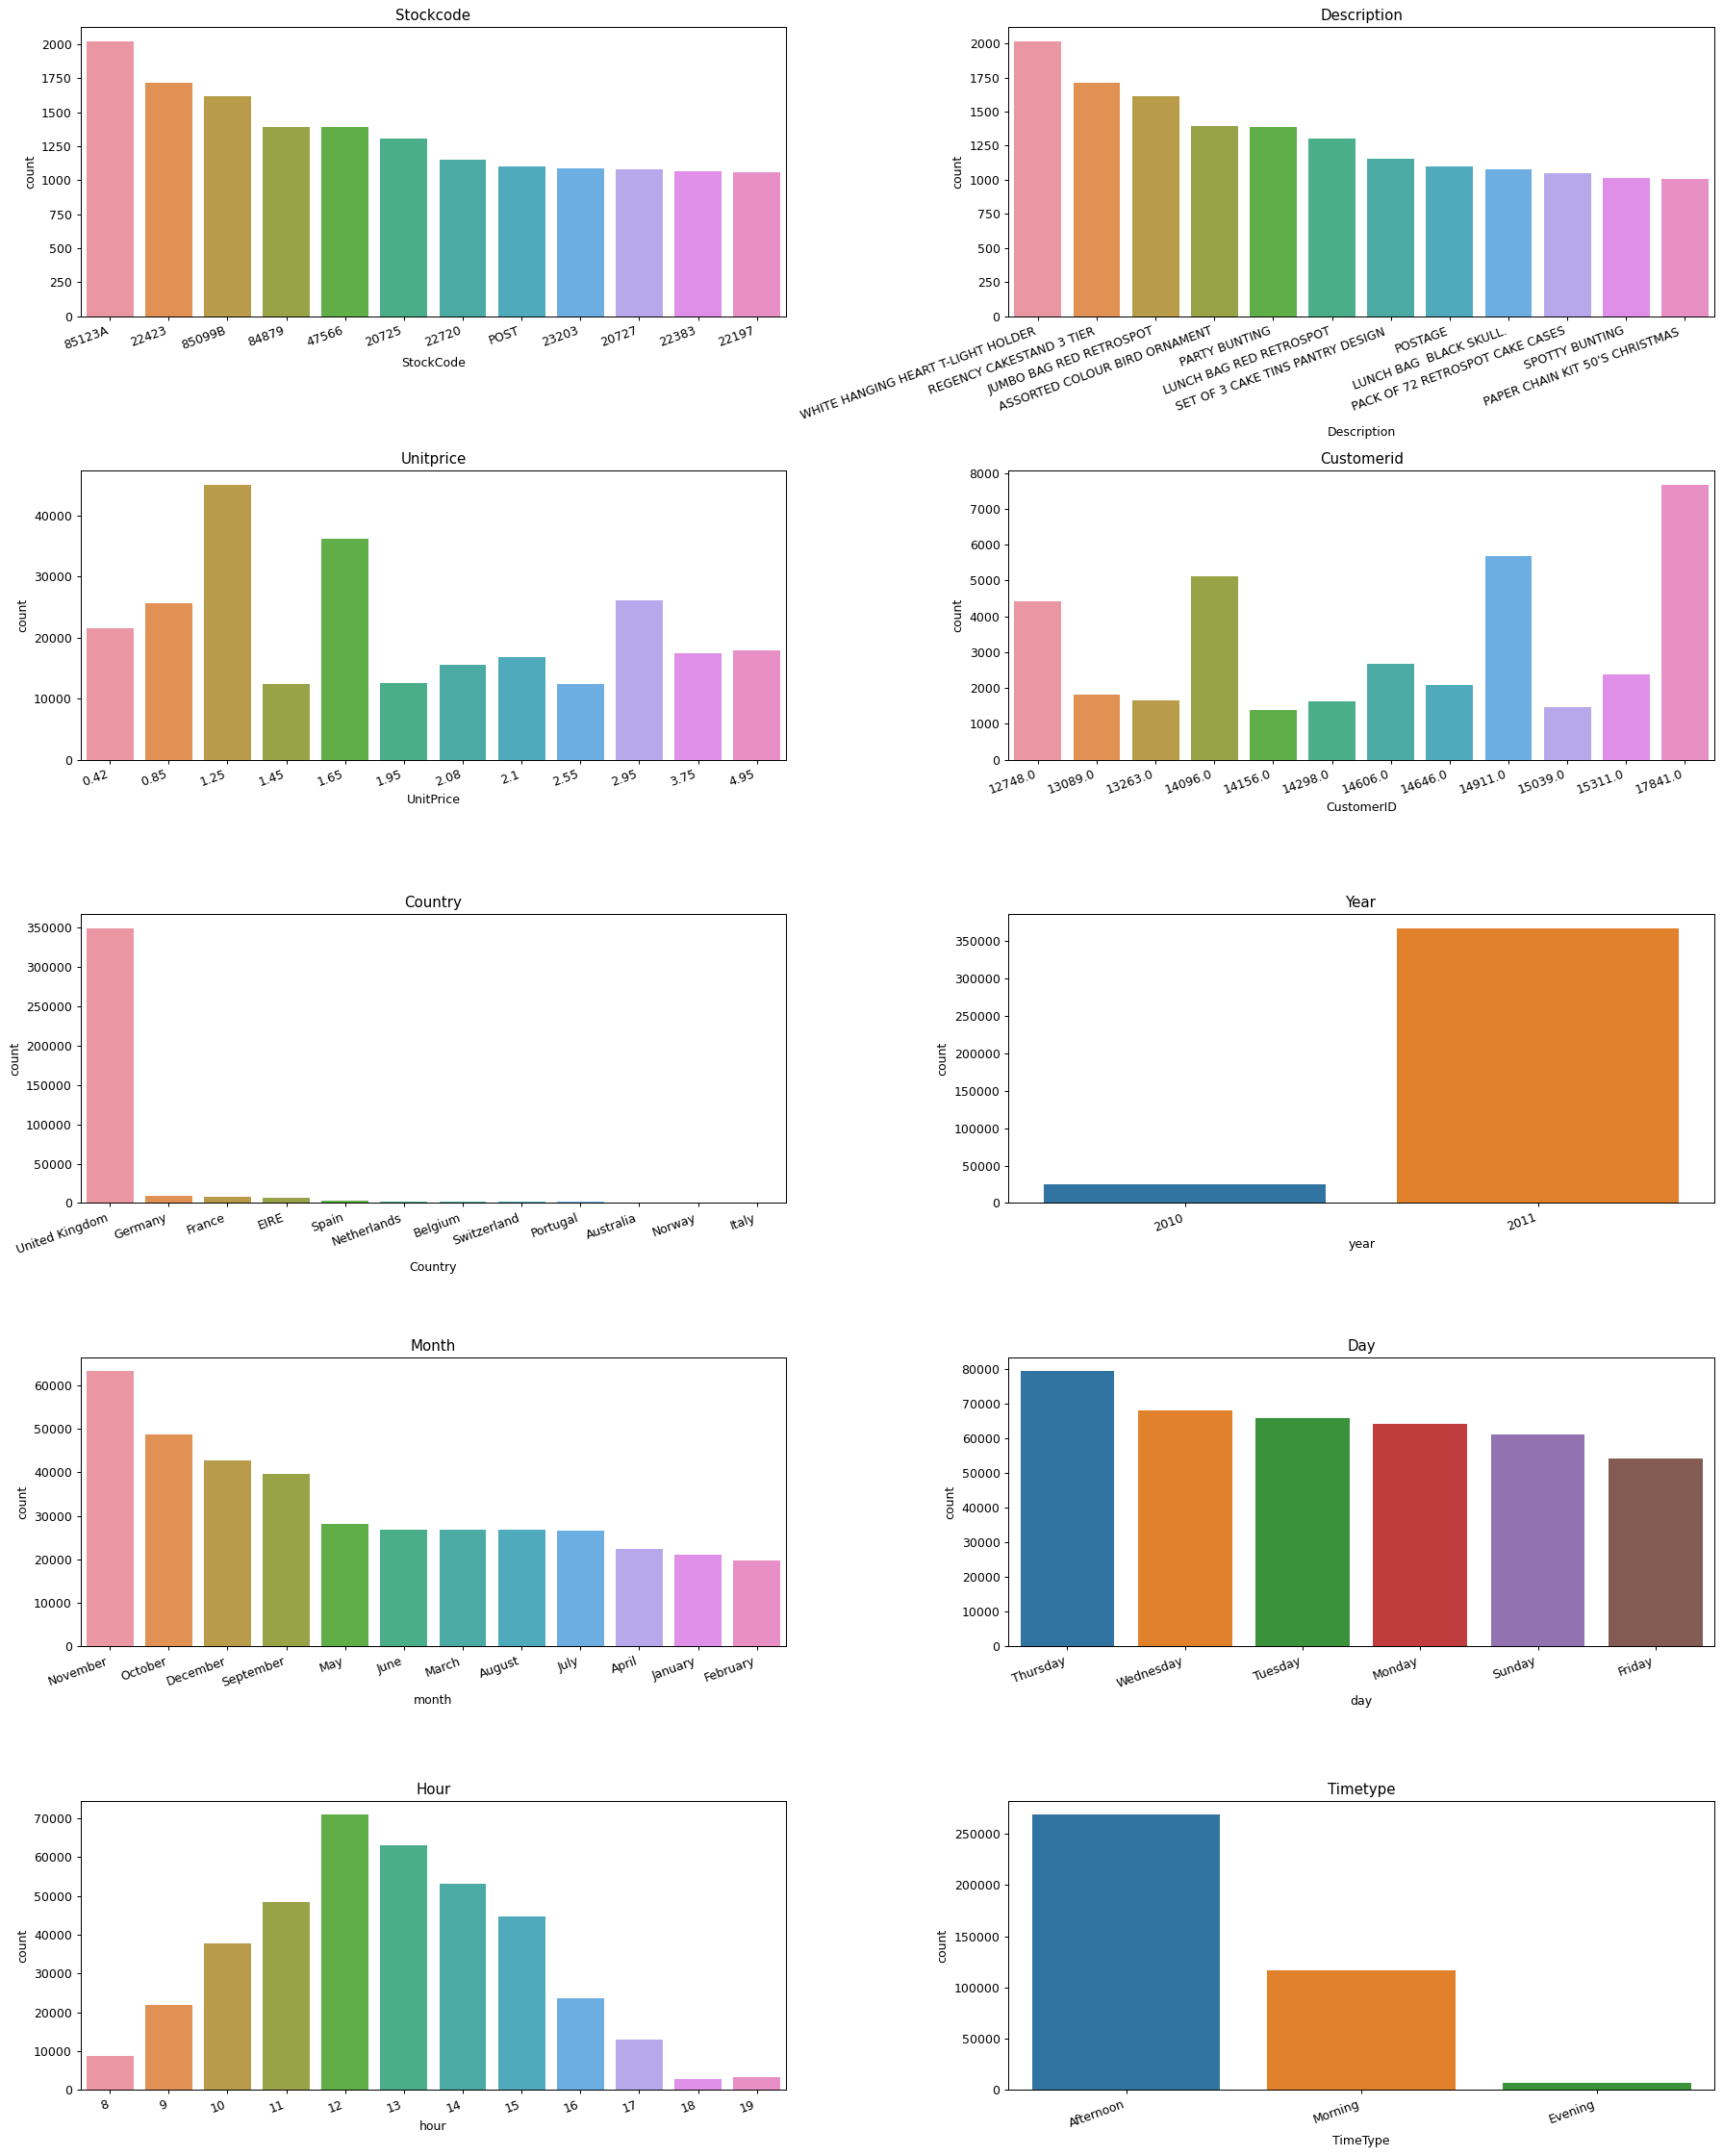

In [21]:
# Ploting top values based on frequency in each column
column = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'month','day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(column):
  plt.subplot(5,2,n+1)
  temp = dt[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index' : col, col:'count'}, inplace=True)
  sns.barplot(x=col, y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20, ha='right')
  plt.tight_layout()

Observations/hypothesis -  

*   WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products,
*   2011 is our high selling year and 2010 is least,
*   Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.
*   Most of the customers have purchased the gifts in the month of November, October, December and September, Less number of customers have purchased the gifts in the month of April, January and February.
*   Thursday is high selling day according to data and There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
*   Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.





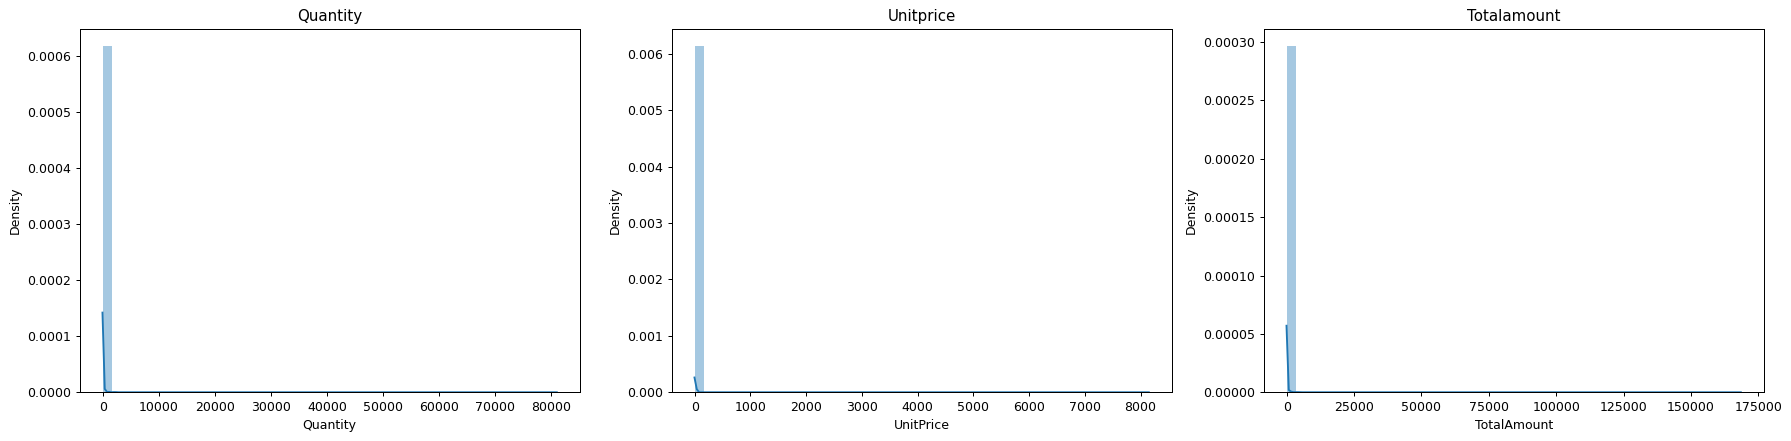

In [22]:
# Visulizing the distribution
column = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(column):
  plt.subplot(1,3,n+1)
  sns.distplot(dt[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
*   It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
*   For symmetric graph mean=median=mode


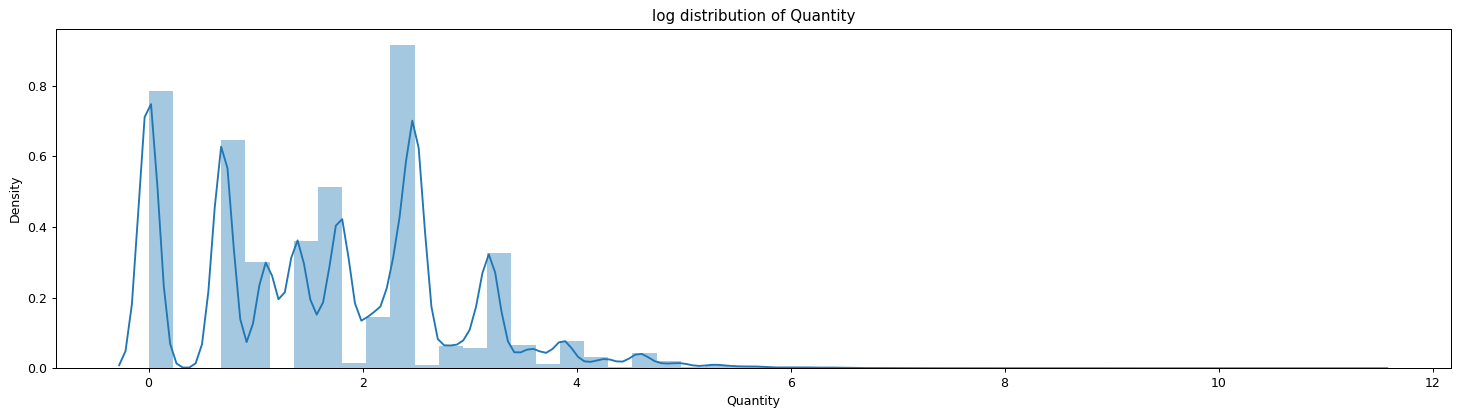

In [23]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(dt['Quantity']))
plt.show()

In [24]:
# Print order placed country
country_invoice = dt.groupby('Country').nunique()['InvoiceNo'].reset_index().sort_values('InvoiceNo', ascending=False)
country_invoice.rename(columns={'InvoiceNo':'Invoice_count'}, inplace=True)
country_invoice.head()

Country  Invoice_count
35  United Kingdom          16649
14         Germany            457
13          France            389
10            EIRE            260
3          Belgium             98

United Kingdom is making most of the purchases as compared to other countries

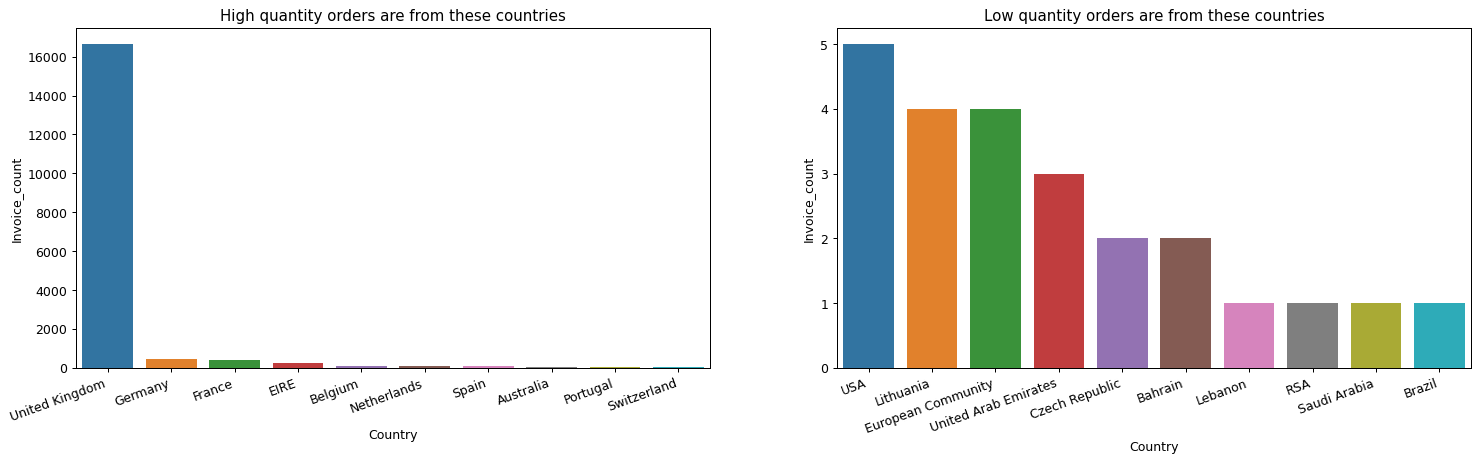

In [25]:
# Visualizing top and bottom 10 countries based on average item purchase
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20, ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_invoice.head(10),x='Country',y='Invoice_count')

plt.subplot(1,2,2)
plt.xticks(rotation=20, ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_invoice.tail(10),x='Country',y='Invoice_count')

In [26]:
# Most customers are from these countries
country_cust = dt.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

United Kingdom has most number of customers

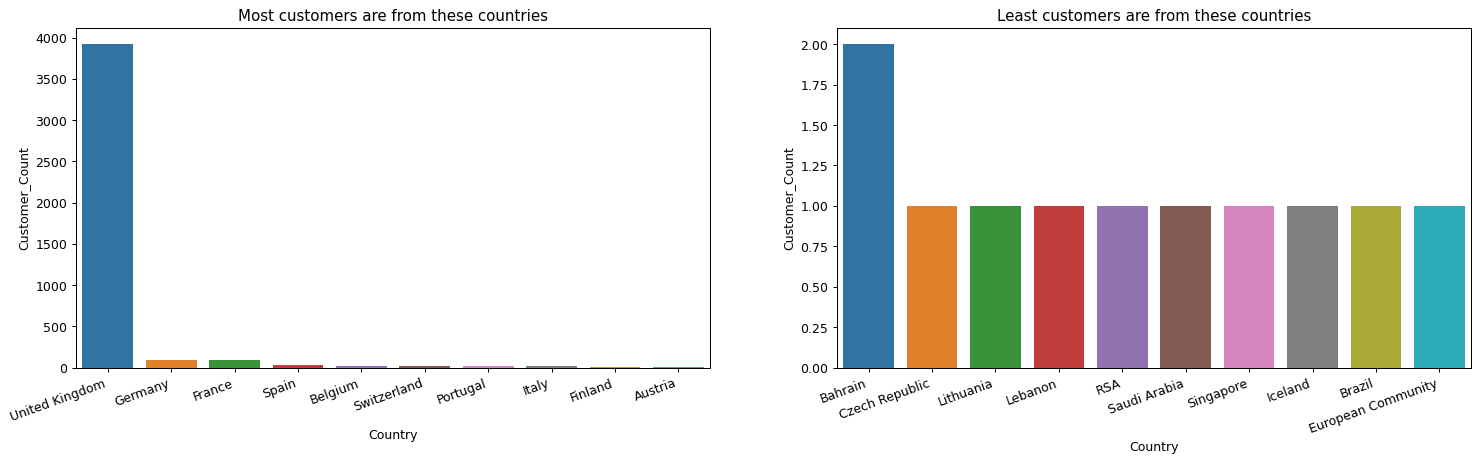

In [27]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [28]:
# Countrywise average item purchases
country_quantity = dt.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
23     Netherlands         85.034702
19           Japan         81.046729
31          Sweden         80.173333
0        Australia         71.114020
8   Czech Republic         26.840000

Orders with mass quantity are placed by the customers from Netherlands

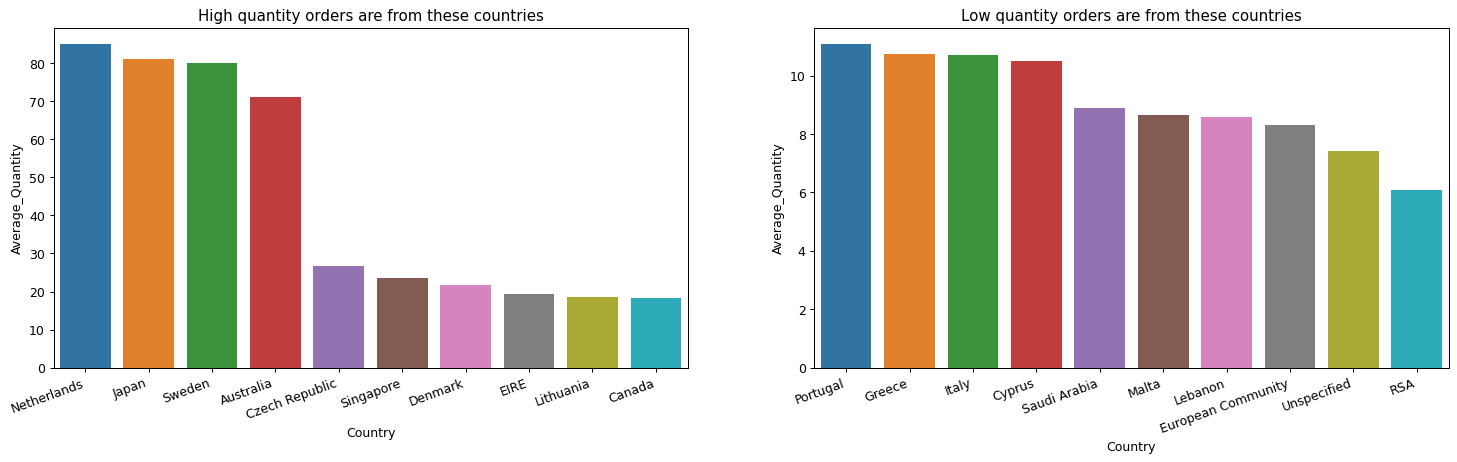

In [29]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [30]:
# quantity wise item purchases
product_quantity = dt.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1762             JUMBO BAG RED RETROSPOT     46078
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706

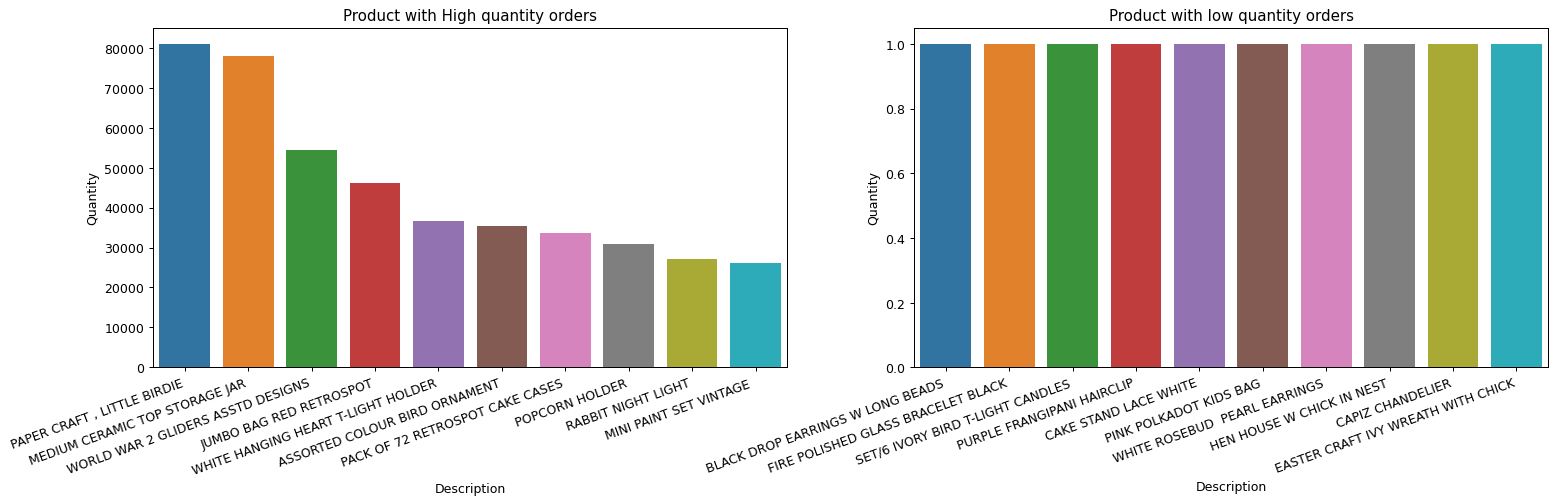

In [31]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [32]:
# Amount wise item purchases
product_price = dt.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1762             JUMBO BAG RED RETROSPOT     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

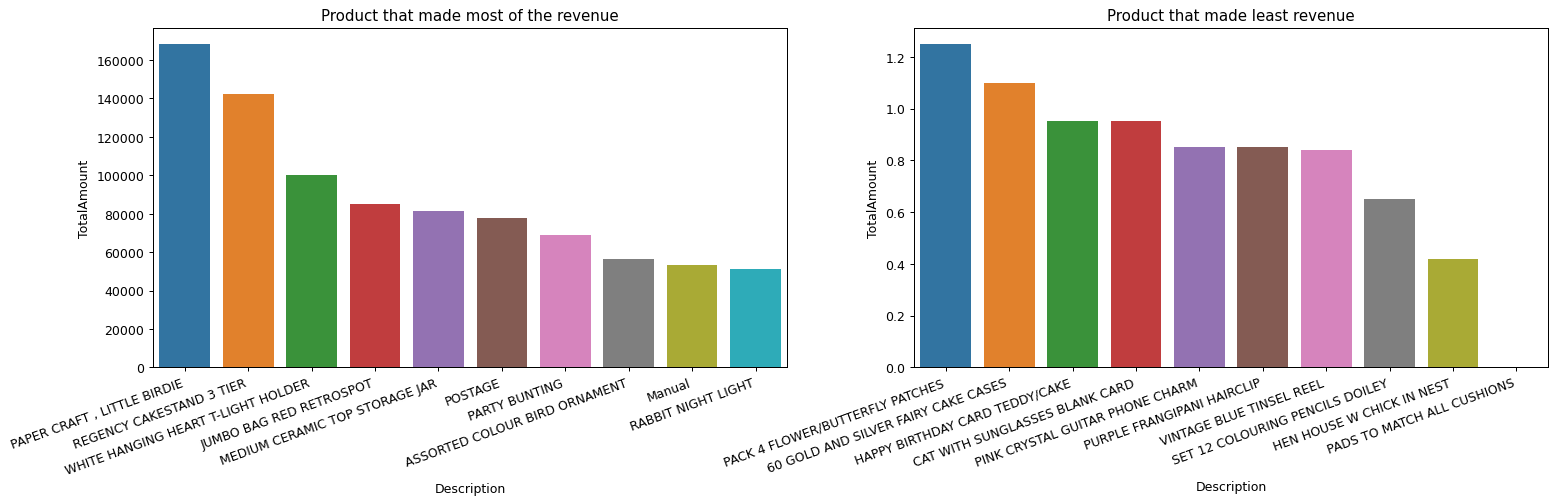

In [33]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [34]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2780            REGENCY CAKESTAND 3 TIER             887
3716  WHITE HANGING HEART T-LIGHT HOLDER             858
2355                       PARTY BUNTING             708
217        ASSORTED COLOUR BIRD ORNAMENT             679
3014   SET OF 3 CAKE TINS PANTRY DESIGN              640

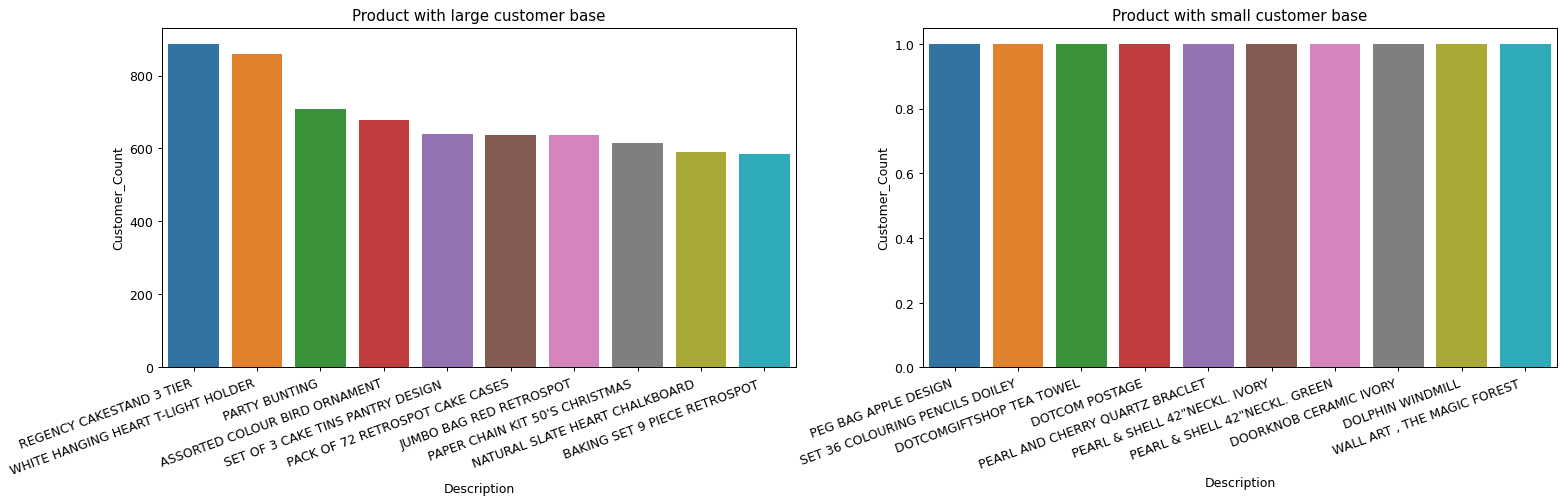

In [35]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [36]:
# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101

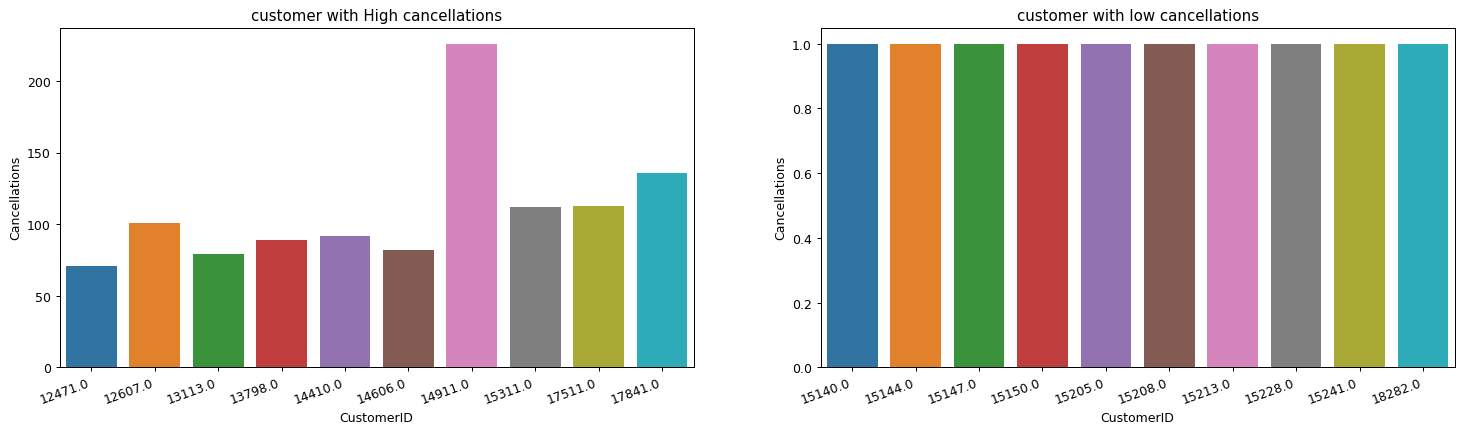

In [37]:
# Visualizing top and bottom 10 customers based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

In [38]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7501
11         Germany            453
7             EIRE            247
10          France            148
26             USA            112

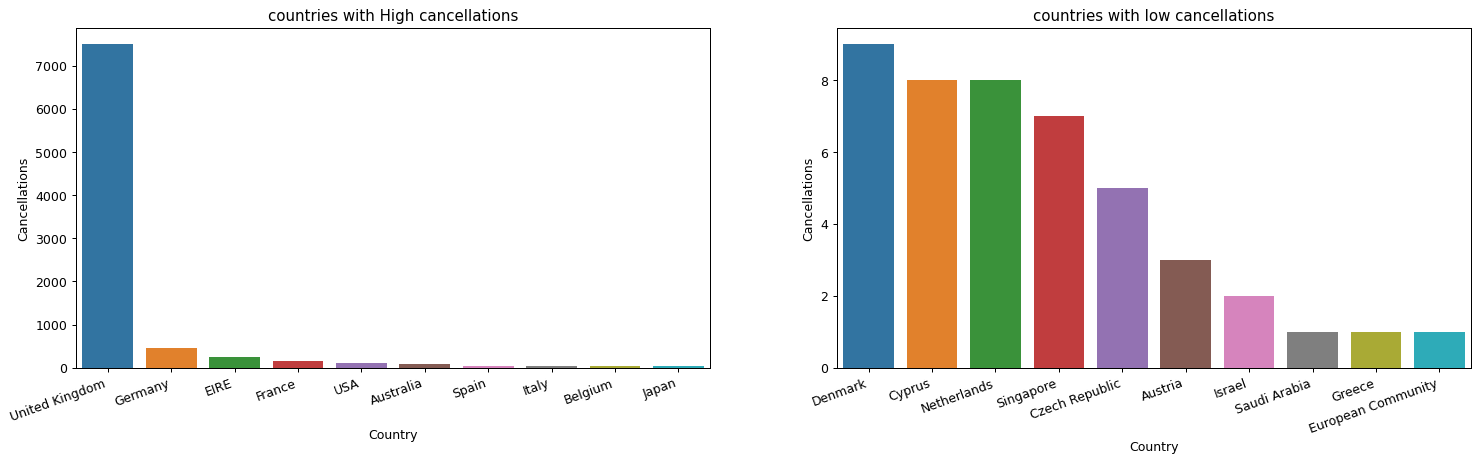

In [39]:
# Visualizing top and bottom 10 countries based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

# **RFM Modelling**

*   Since most of the customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
*   We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT They sell it to individual customers(B2C) or sell all products to another stores (B2B).
*    Due to all these reasons we need to cluster customers according to there activities i.e                         
  1 R-Recency               
  2 F-Frequency            
  3 M-Monetary





In [40]:
# Adding 1 date to the last invoice date to set as latest date for reference
LatestDate = dt['InvoiceDate'].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = dt.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (LatestDate - x.max()).days,
                                    'InvoiceNo' : lambda x : len(x), 'TotalAmount' : lambda x : x.sum()})
# Remaining the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Check top 5 rows
rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

Interpretation:          
  1 Recency: How recent a customer made a purchase.            
  2 Frequency: How often a customer makes a purchase.       
  3 Monetary: How much money a customer spends.

In [41]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the rfm group for each customer by combining the factor R, F and M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the rfm group for each customer by adding the factor R, F and M
rfm['RFM_score'] = rfm['R'] + rfm['F'] + rfm['M']

Interpretation :                          
  1 If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.           
  2 If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.            
  3 If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.              
  4 Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [42]:
# Handling the zeros in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying log transformation on columns for smoothening the distribution
rfm['Recency_log'] = rfm['Recency'].apply(np.log)
rfm['Frequency_log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_log'] = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_log  Frequency_log  Monetary_log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [43]:
# check discriptive stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    90.512100    2048.216154     2.514174     2.487670   
std     100.009747   225.515328    8984.248299     1.126392     1.122724   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     306.455000     2.000000     1.000000   
50%      51.000000    41.000000     668.560000     3.000000     2.000000   
75%     142.000000    98.000000    1660.315000     4.000000     3.000000   
max     374.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_score  Recency_log  Frequency_log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.793962     7.501729     3.767274       3.670868   
std       1.118266   118.825268     2.816451     1.432382       1.321685   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.584967   
max       4.000000   444.000000    12.000000     5.924256       8.945854   

       Monetary_log  
count   4339.000000  
mean       6.584187  
std        1.265573  
min        0.000000  
25%        5.725071  
50%        6.505126  
75%        7.414763  
max       12.543280

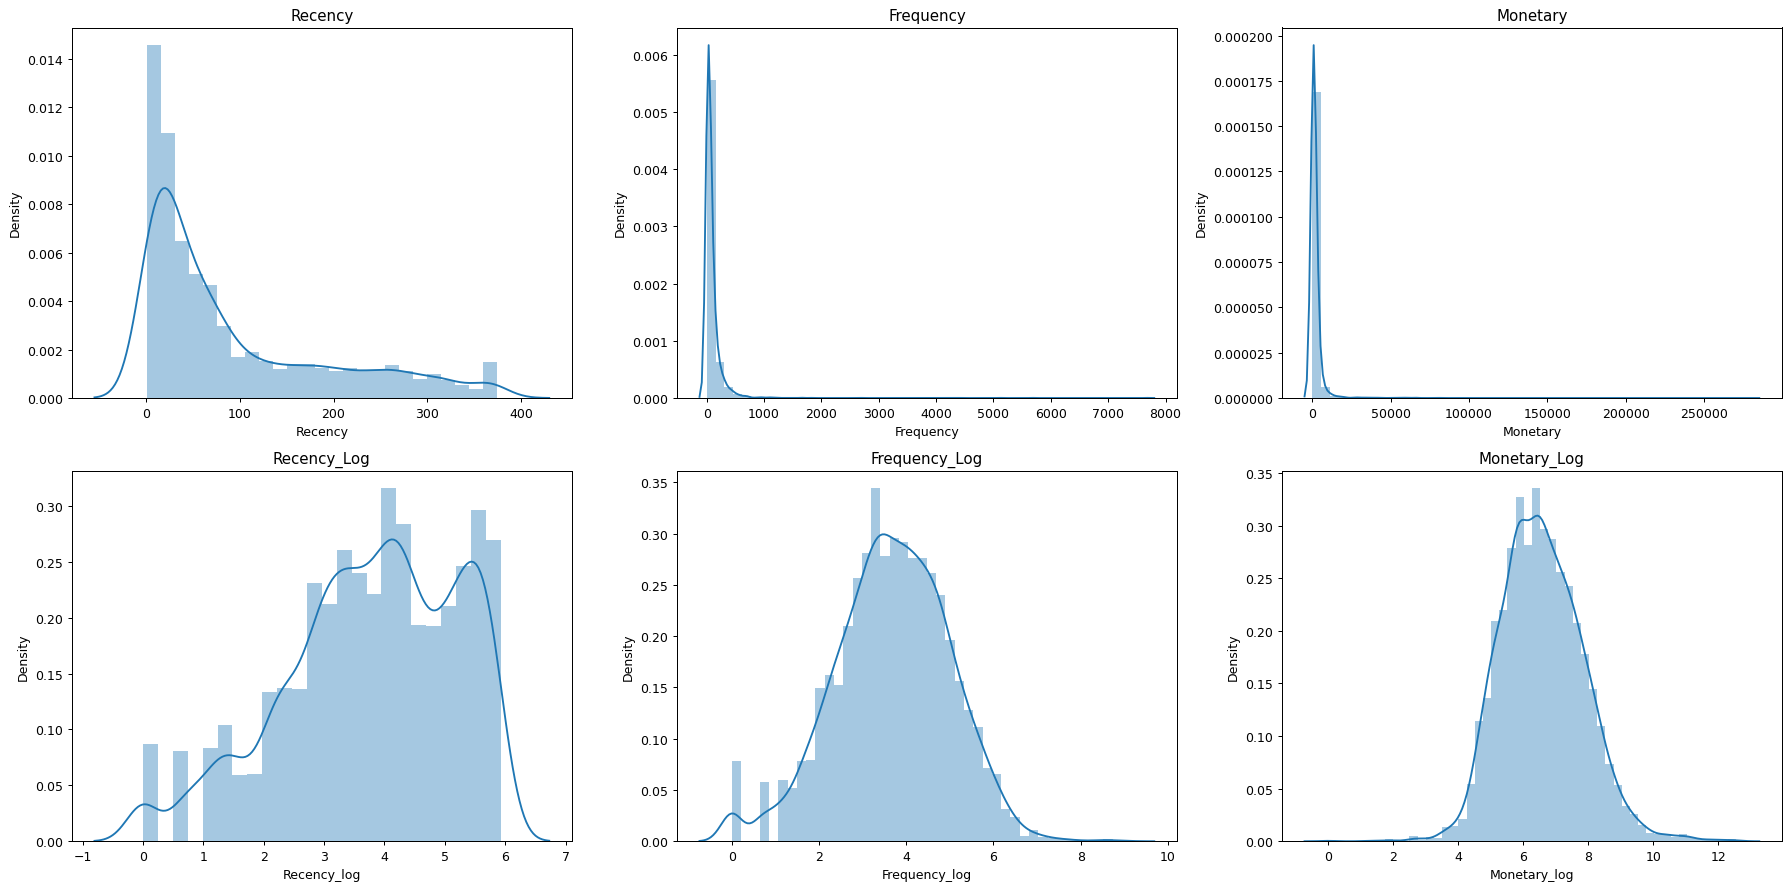

In [44]:
# Visualizing the distribution before and after log transformation
column = ['Recency','Frequency','Monetary', 'Recency_log','Frequency_log','Monetary_log']
plt.figure(figsize=(20,10),dpi=90)
for n,col in enumerate(column):
  plt.subplot(2,3,n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations                         
  1 Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.               
  2 It will be more suitable to use the transformed features for better visualisation of clusters.

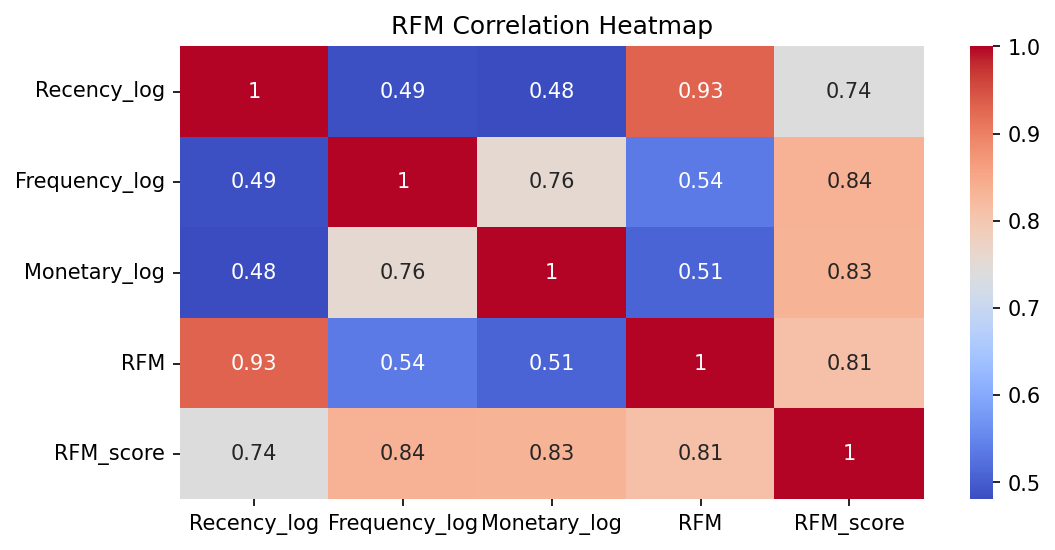

In [45]:
# Visualizing the correlations among features
column = ['Recency_log','Frequency_log','Monetary_log','RFM','RFM_score']

plt.figure(figsize=(8,4), dpi=150)
sns.heatmap(abs(rfm[column].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **Clustering**

**Prerequisites**

In [46]:
# For plots and visualizations
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

In [47]:
# Defining x variables
X = rfm[['Recency_log','Frequency_log','Monetary_log']]
X = StandardScaler().fit_transform(X)

In [48]:
# Initializing an empty dictinory to store stats and summary of all the cluster
conclusion = {}

# Define a function to remove outliers
def cap_outliers(col,overlap_supress):
  '''
  Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float
    Returns:Capped column with outliers removed

  '''

  condition1 = col < col.quantile(1-overlap_supress)
  condition2 = col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group

  '''

  # Storing mean median and count of recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25 and 0.75 quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
            "Recency" : lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
            "Frequency" : lambda x : f"Bought{int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
            "Monetary" : lambda x : f"spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} sterling"})
  
  # Changing name for the columns
  stats.columns = [f'{i}_{j}' for i,j in stats.columns]
  summary.columns = ["Last_visited",'purchase_frequency', "Money_spend"]

  return stats, summary

# Defining a function for plotting clusterfor visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
    Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
    Returns: Array of DataFrames
    features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats

  '''
  rfm[segment_name] = y                                                         # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                                   # store legends for features
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm, segment_name)

  # Part1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize=(18,6),dpi=90)                                            # Setting the size of the figure`
  ax = plt.axes(projection = "3d")                                              # intializing axis
  ax.set_xlabel('Recency', fontweight='bold')                                   # Setting X label
  ax.set_ylabel('Frequency', fontweight='bold')                                 # Setting Y label
  ax.set_zlabel('Monetary', fontweight='bold')                                  # Setting Z label
  ax.set_title(title, fontweight='bold')                                        # Seting title
  ax = ax.scatter(X[:,0],X[:,1],X[:,2], c=y, cmap='viridis')                    # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size':15})                            # positioning legend

  # Part2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18,18),dpi=90)                               # setting the size of the figure
  # Running the for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(['Recency','Frequency','Monetary']):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col],overlap_supress),ax=ax[index], kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight='bold')             # Setting the main title
      ax[index].legend(groups,prop={'size':15})                                 # Assiging legends for all the axes 
  plt.show()

  # Part3 : Displaying the stats and summary
  # Displayind mean, median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency , Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap='plasma'))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap="plasma"))

  return stats, summary

**Binning RFM Score**

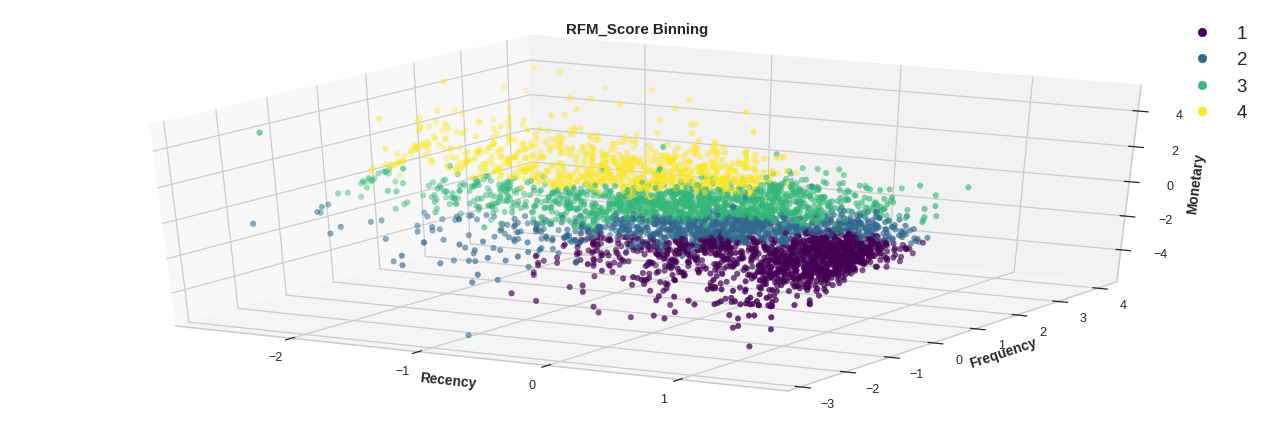

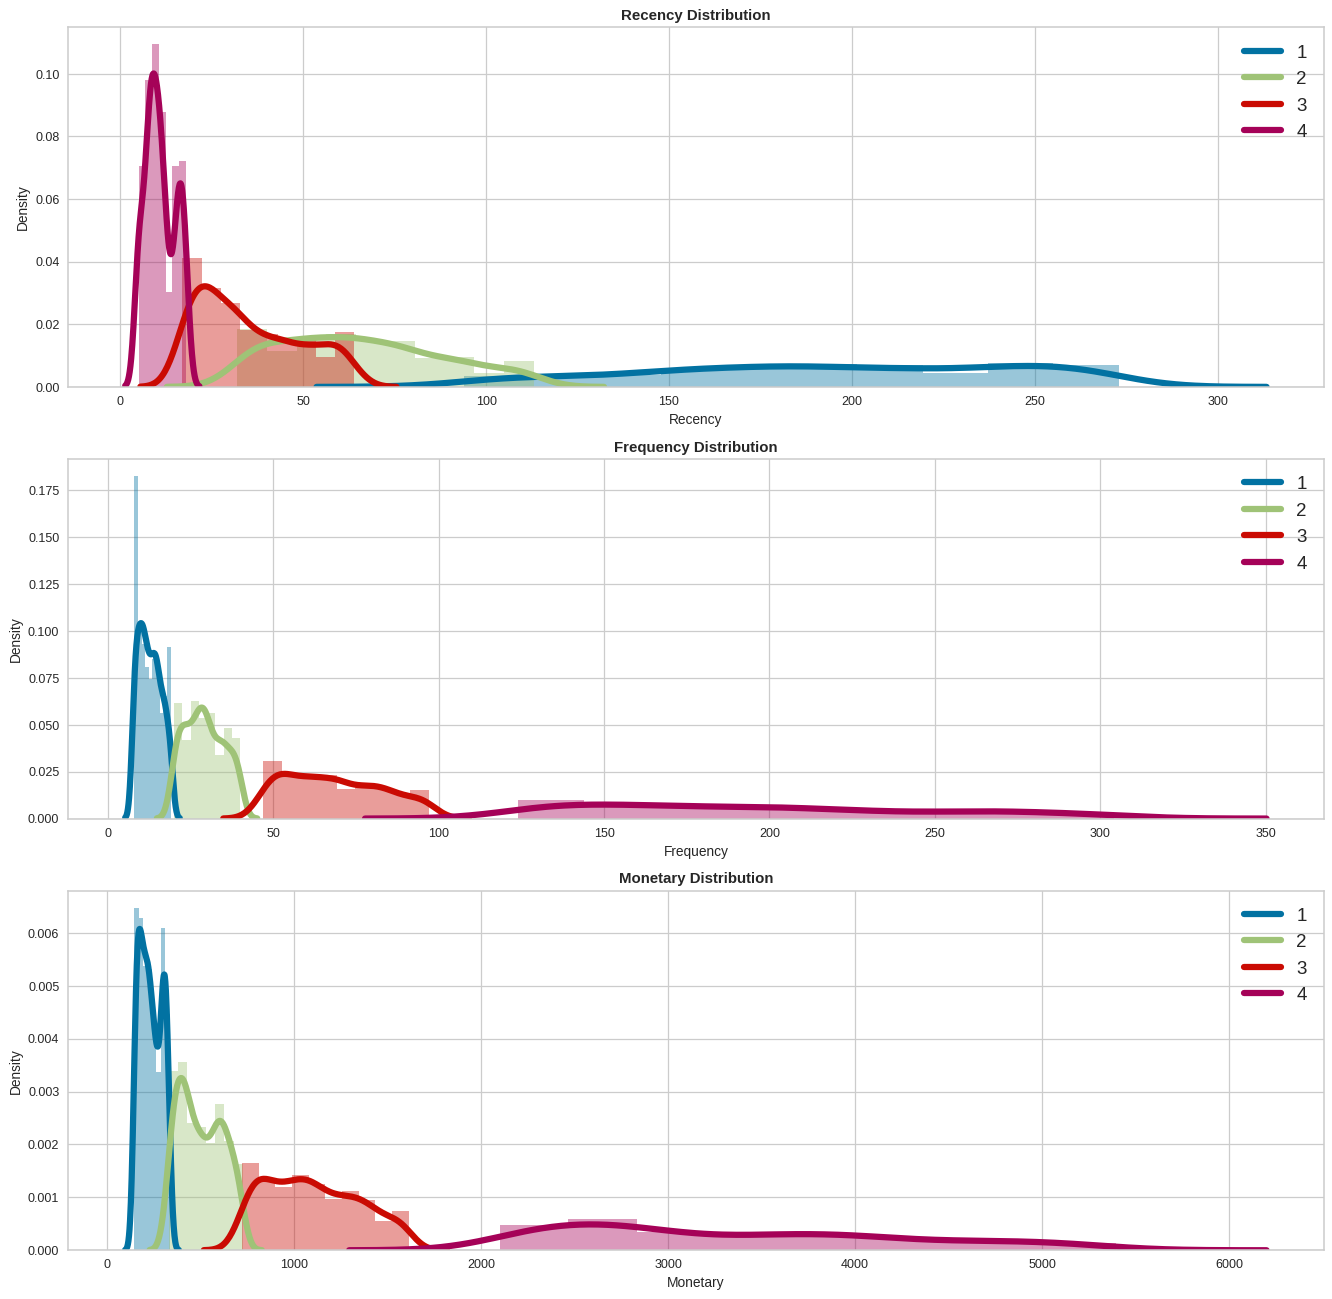



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [49]:
# Splitting RFM_score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_score'], q=4, labels=[1,2,3,4]).astype(int)

# plotting segment for visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

**Quantile Based Clustering**

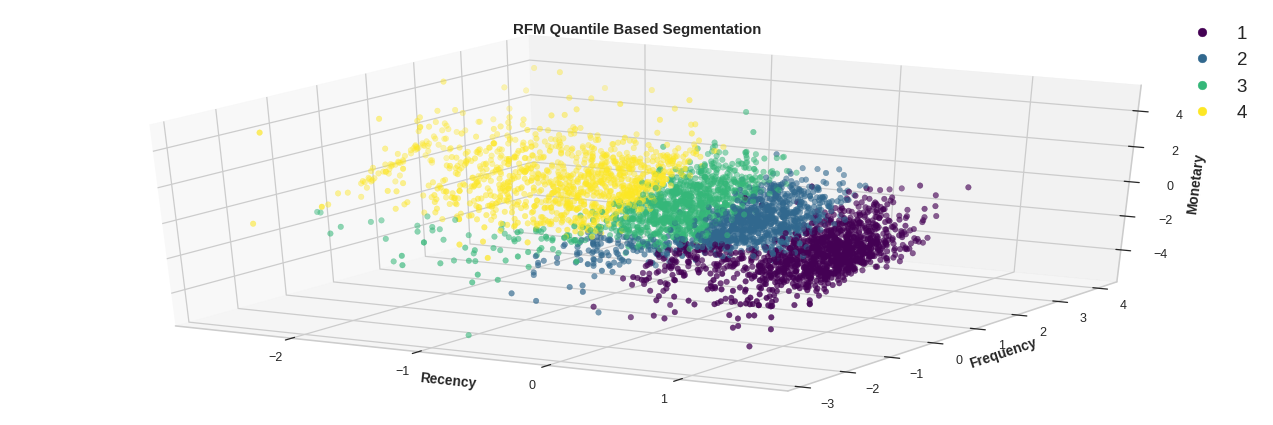

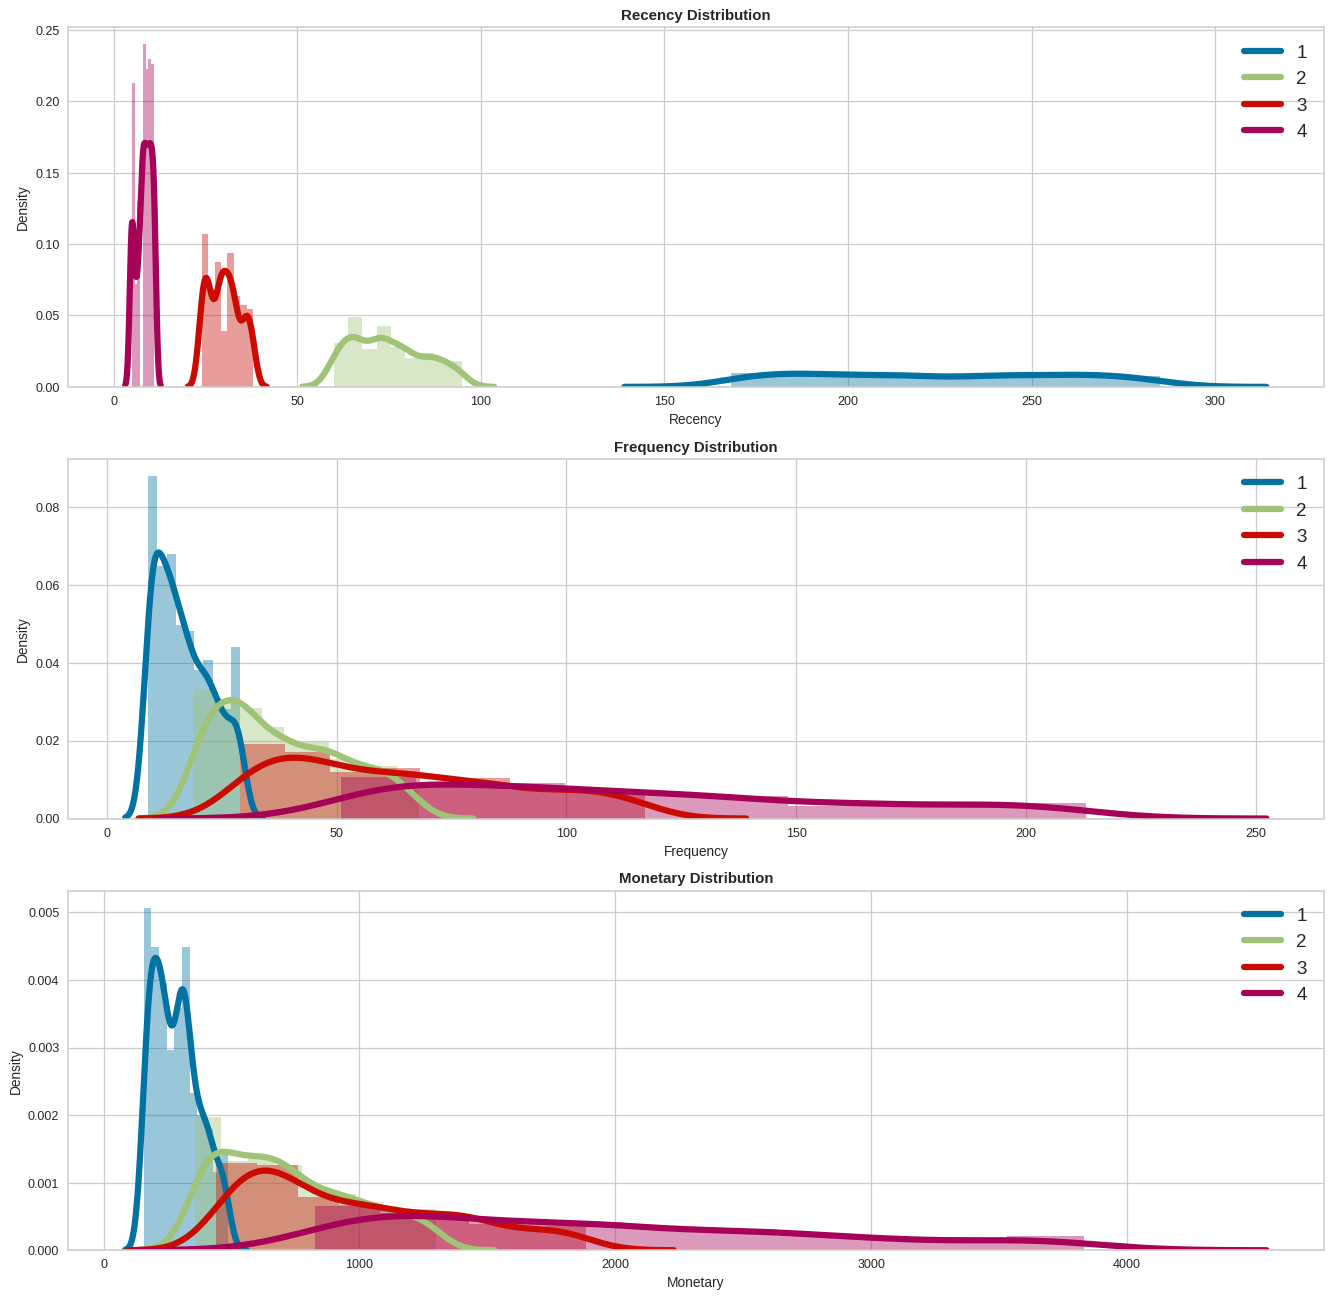



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [50]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

**K-Means Clustering**

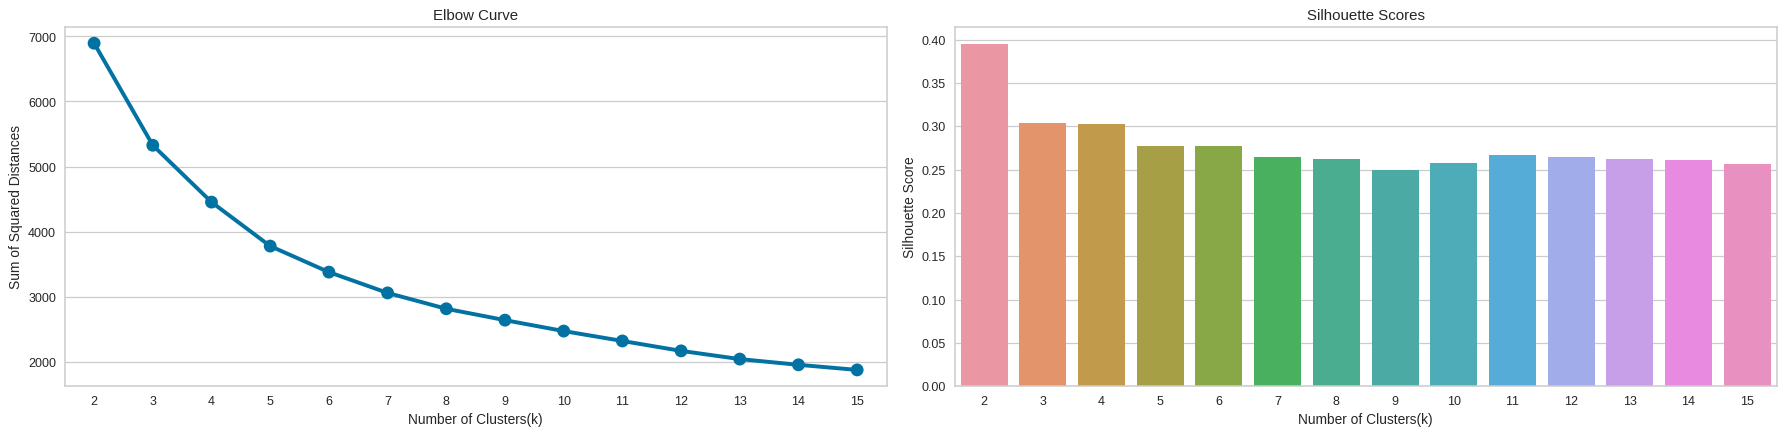

In [51]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means cluster
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

Observations :                      
1 From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.                    
  2 If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen.                   
  3 If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

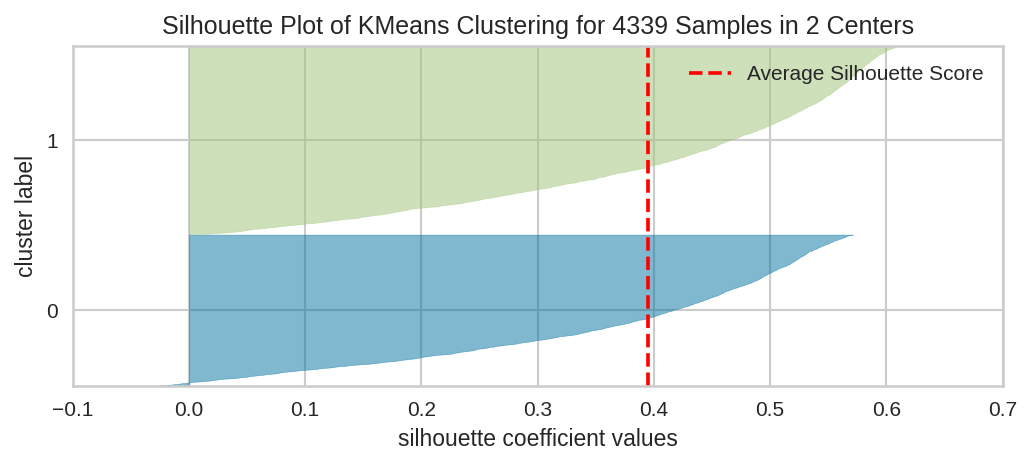

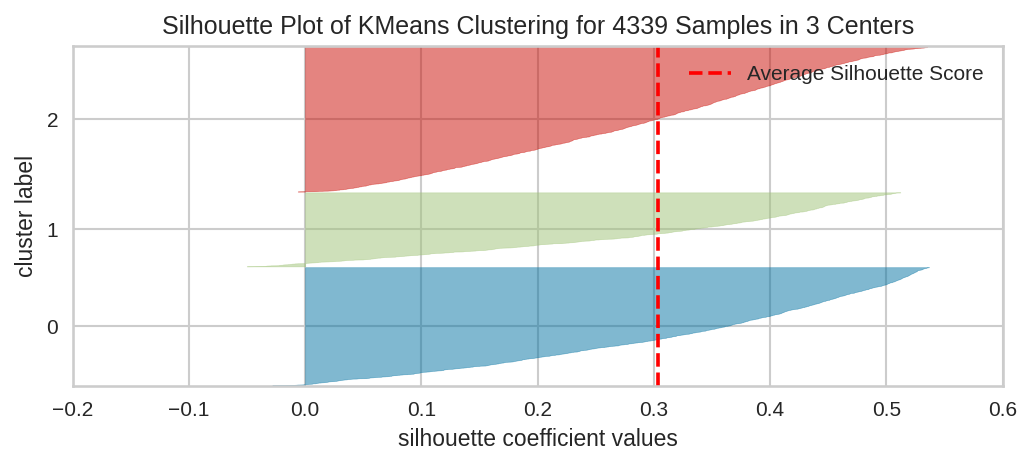

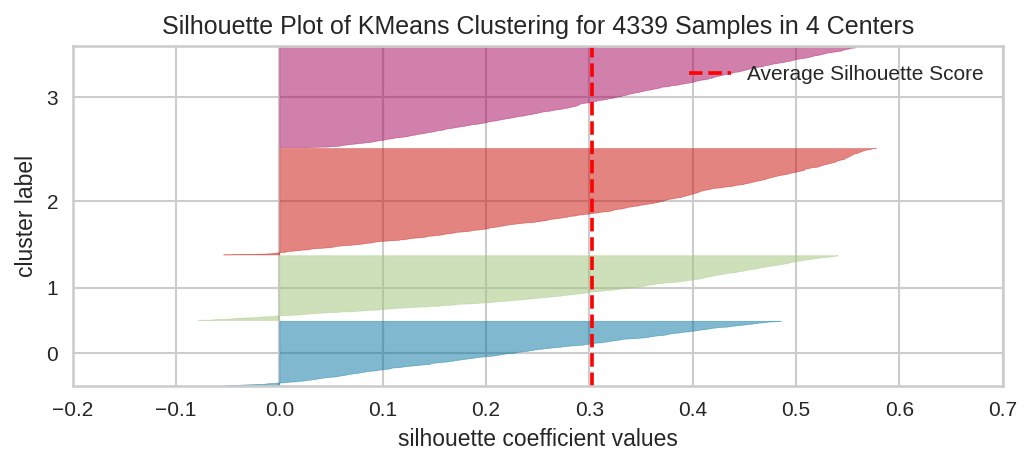

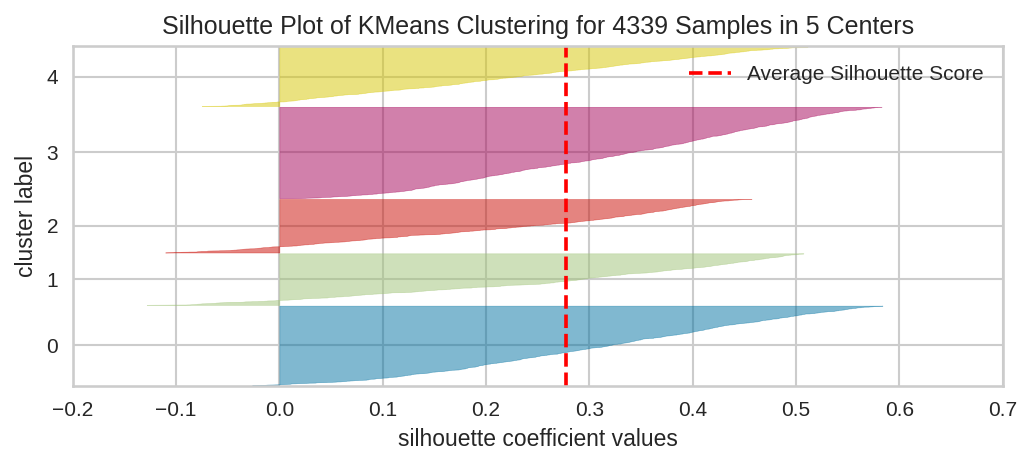

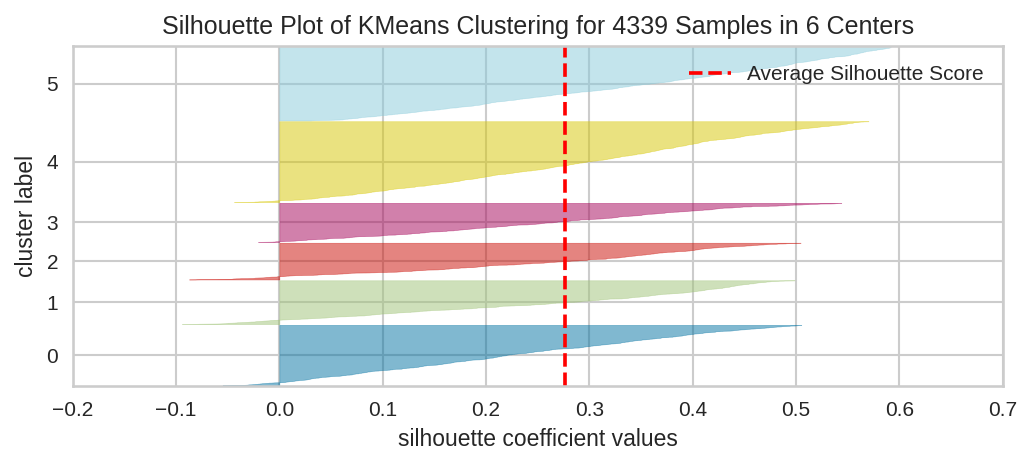

In [52]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

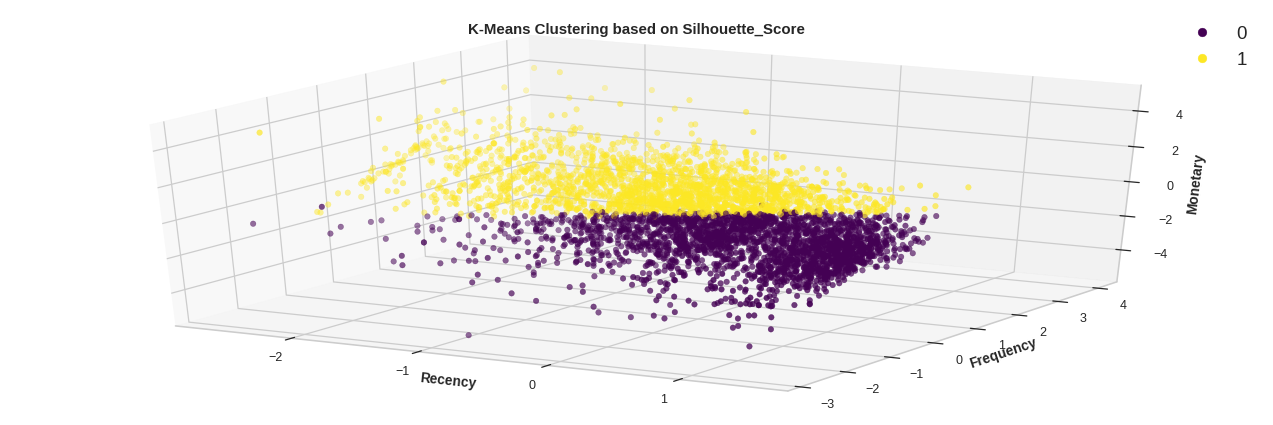

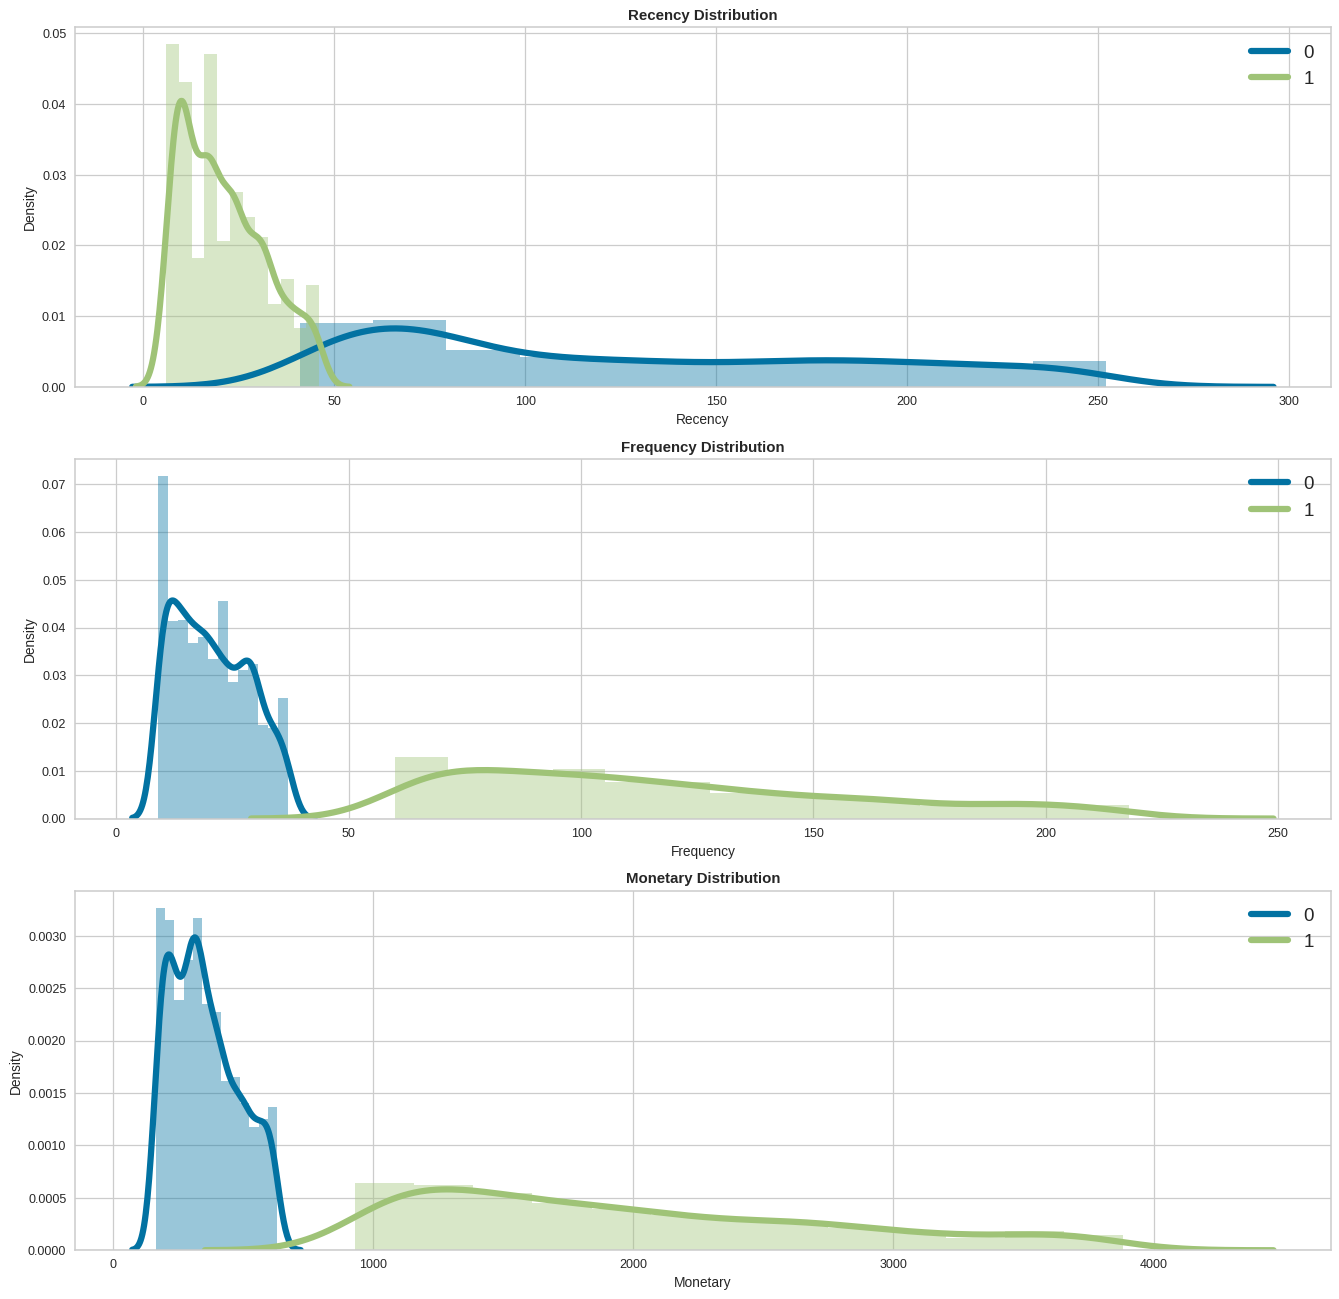



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [53]:
# Fitting model on n_clusters = 2 based on silhouette_score to visualise the segments
kmc = KMeans(n_clusters=2, init='k-means++')                                    # Setting two clusters
y = kmc.fit_predict(X)                                                          # Fitting the model
centers = kmc.cluster_centers_                                                  # Storing the centroids

# Plotting clusters for visualization
title = 'K-Means Clustering based on Silhouette_Score'                          # Setting the title
segment_name = 'K-means|2cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

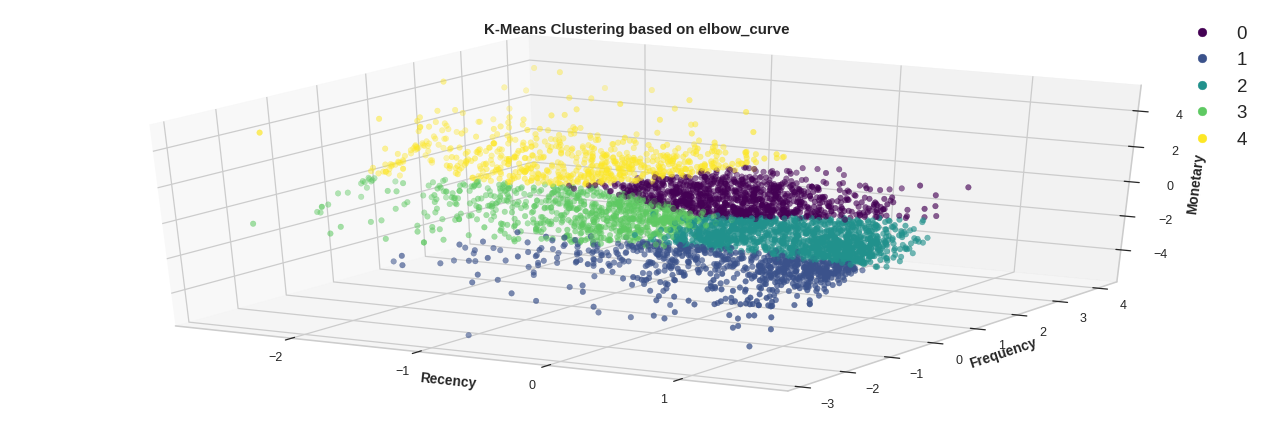

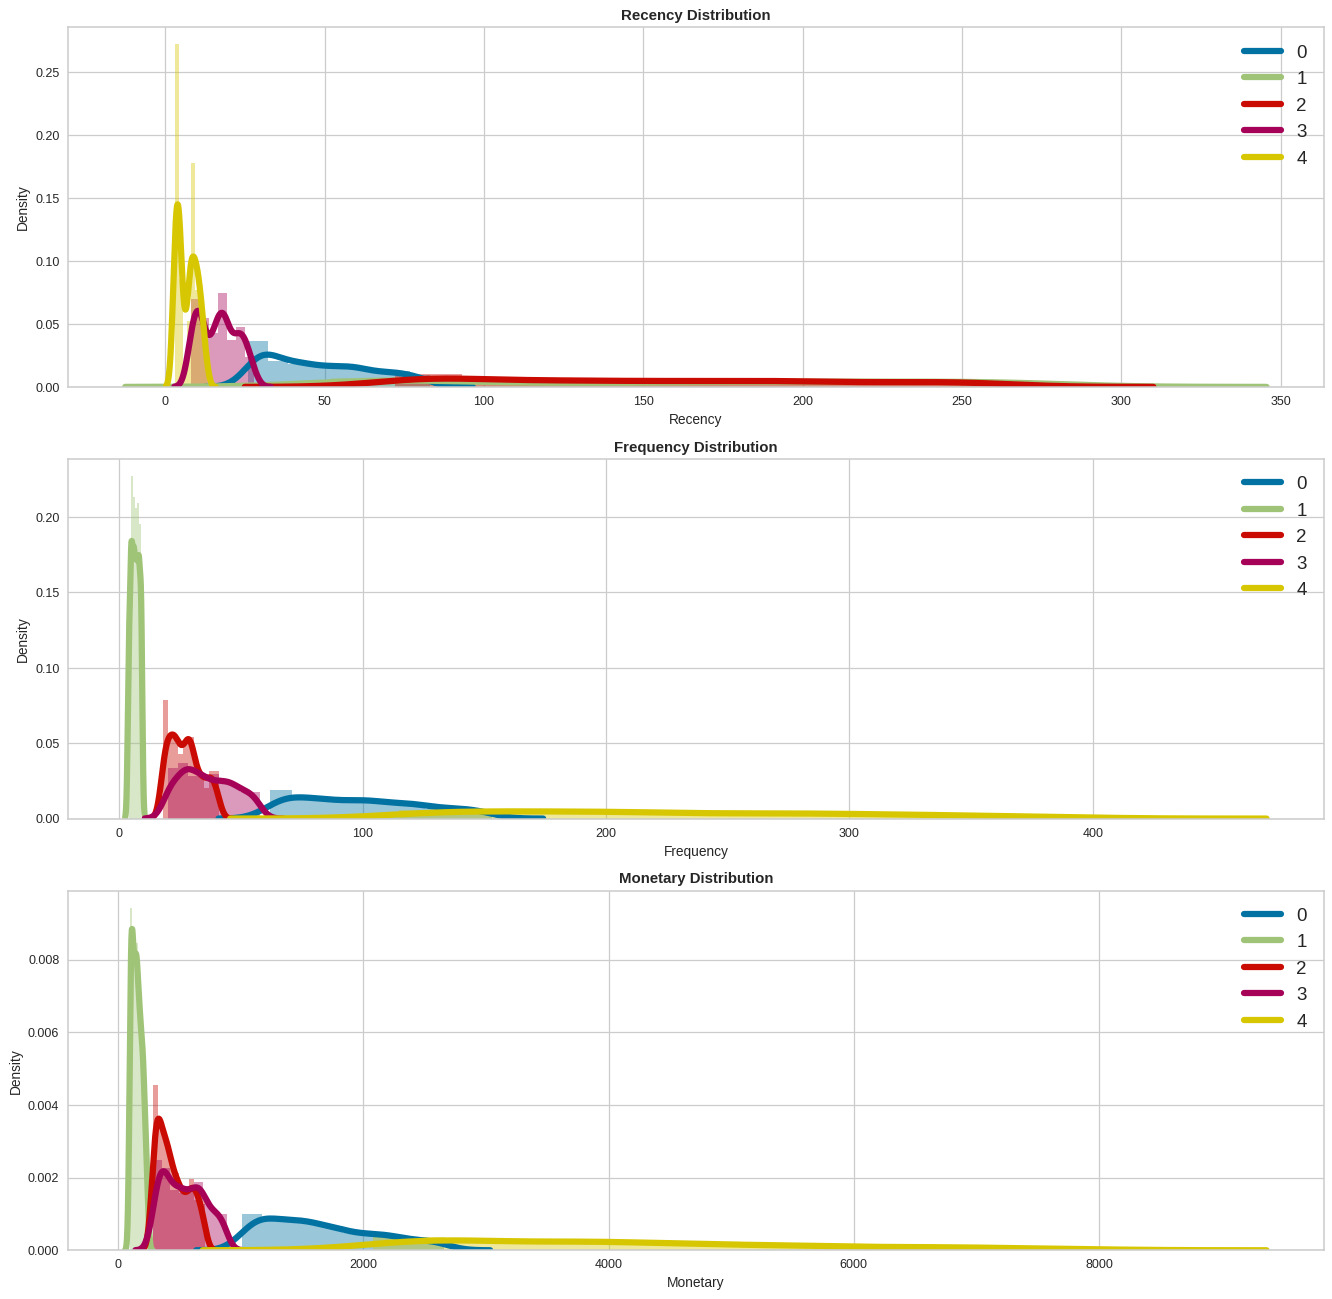



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [54]:
# Fitting model on n_clusters = 5 based on elbow_curve to visualise the segments
kmc = KMeans(n_clusters=5, init='k-means++')                                    # Setting two clusters
y = kmc.fit_predict(X)                                                          # Fitting the model
centers = kmc.cluster_centers_                                                  # Storing the centroids

# Plotting clusters for visualization
title = 'K-Means Clustering based on elbow_curve'                               # Setting the title
segment_name = 'K-means|5cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

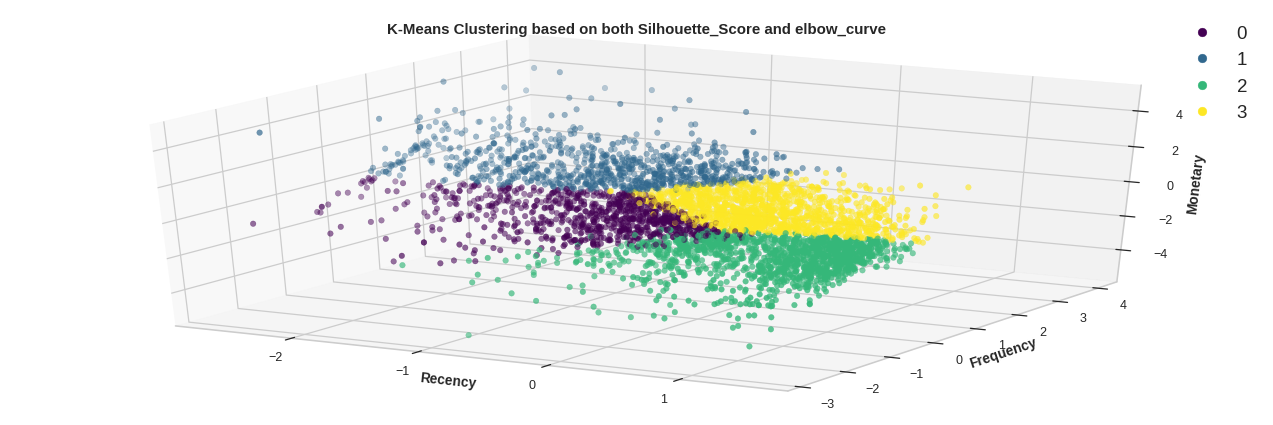

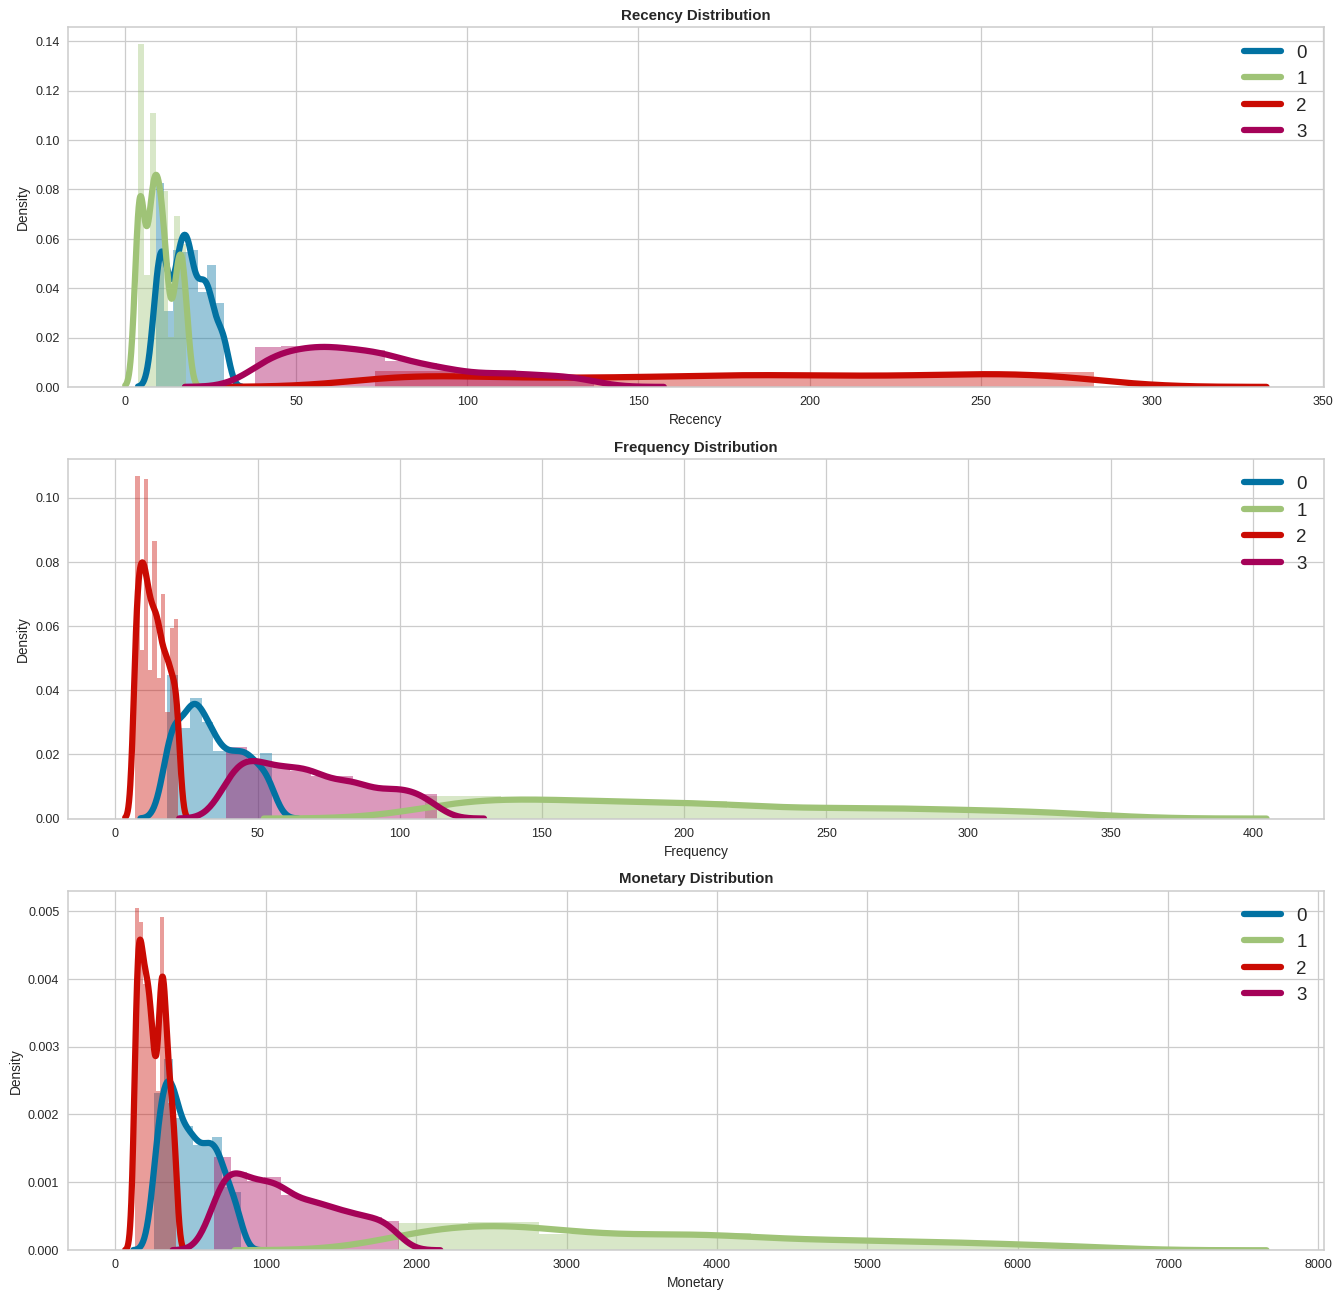



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [55]:
# Fitting model on n_clusters = 4 based on both silhouette_score and elbow_curve to visualise the segments
kmc = KMeans(n_clusters=4, init='k-means++')                                    # Setting two clusters
y = kmc.fit_predict(X)                                                          # Fitting the model
centers = kmc.cluster_centers_                                                  # Storing the centroids

# Plotting clusters for visualization
title = 'K-Means Clustering based on both Silhouette_Score and elbow_curve'     # Setting the title
segment_name = 'K-means|4cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

**Hierarchical Clustering**

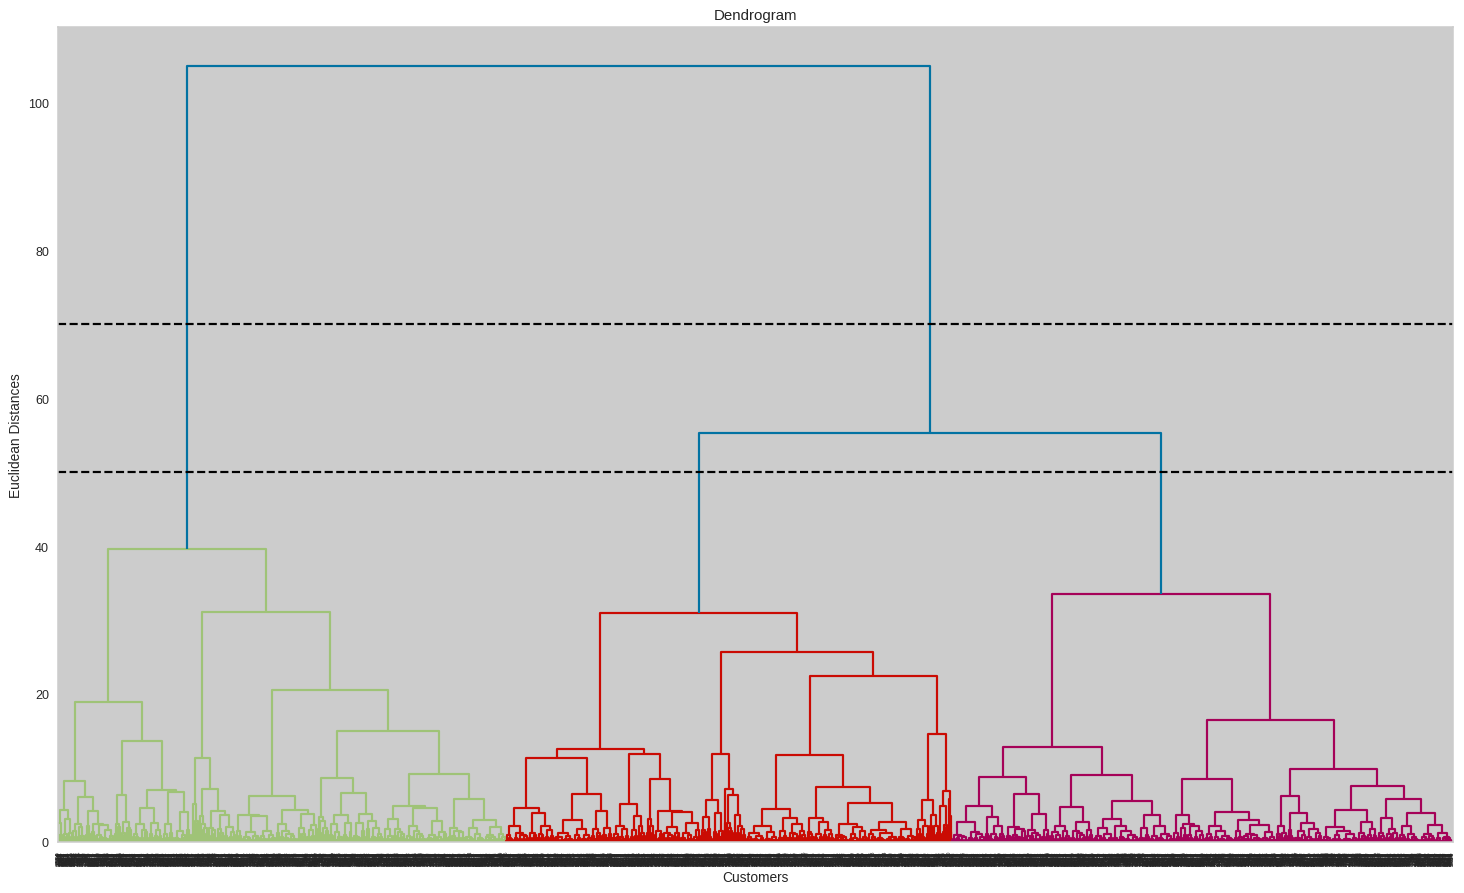

In [56]:
# Using the Dendrogram to decide the number of clusters
plt.figure(figsize=(20,12),dpi=90)                                              # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)                       # using ward linkage method to differ similarities
plt.title('Dendrogram')                                                         # Setting the title
plt.xlabel('Customers')                                                         # Setting x label
plt.ylabel('Euclidean Distances')                                               # Setting y label
plt.axhline(y=70, color='black', linestyle='--')                                # Setting the axis line for 50
plt.axhline(y=50, color='black', linestyle='--')                                # Setting the axis line for 50
plt.show()

Interpretation                                    
  1 We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.                      
  2 The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

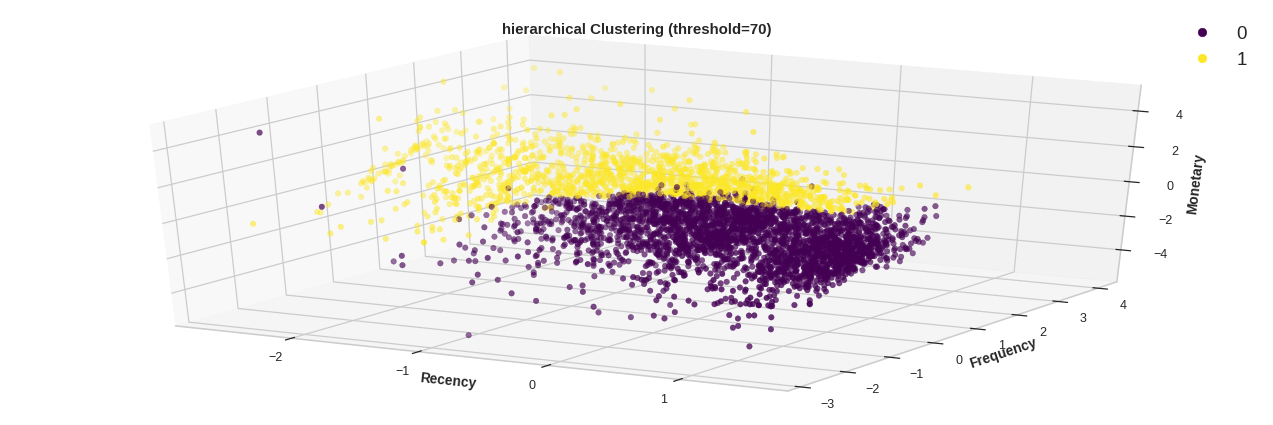

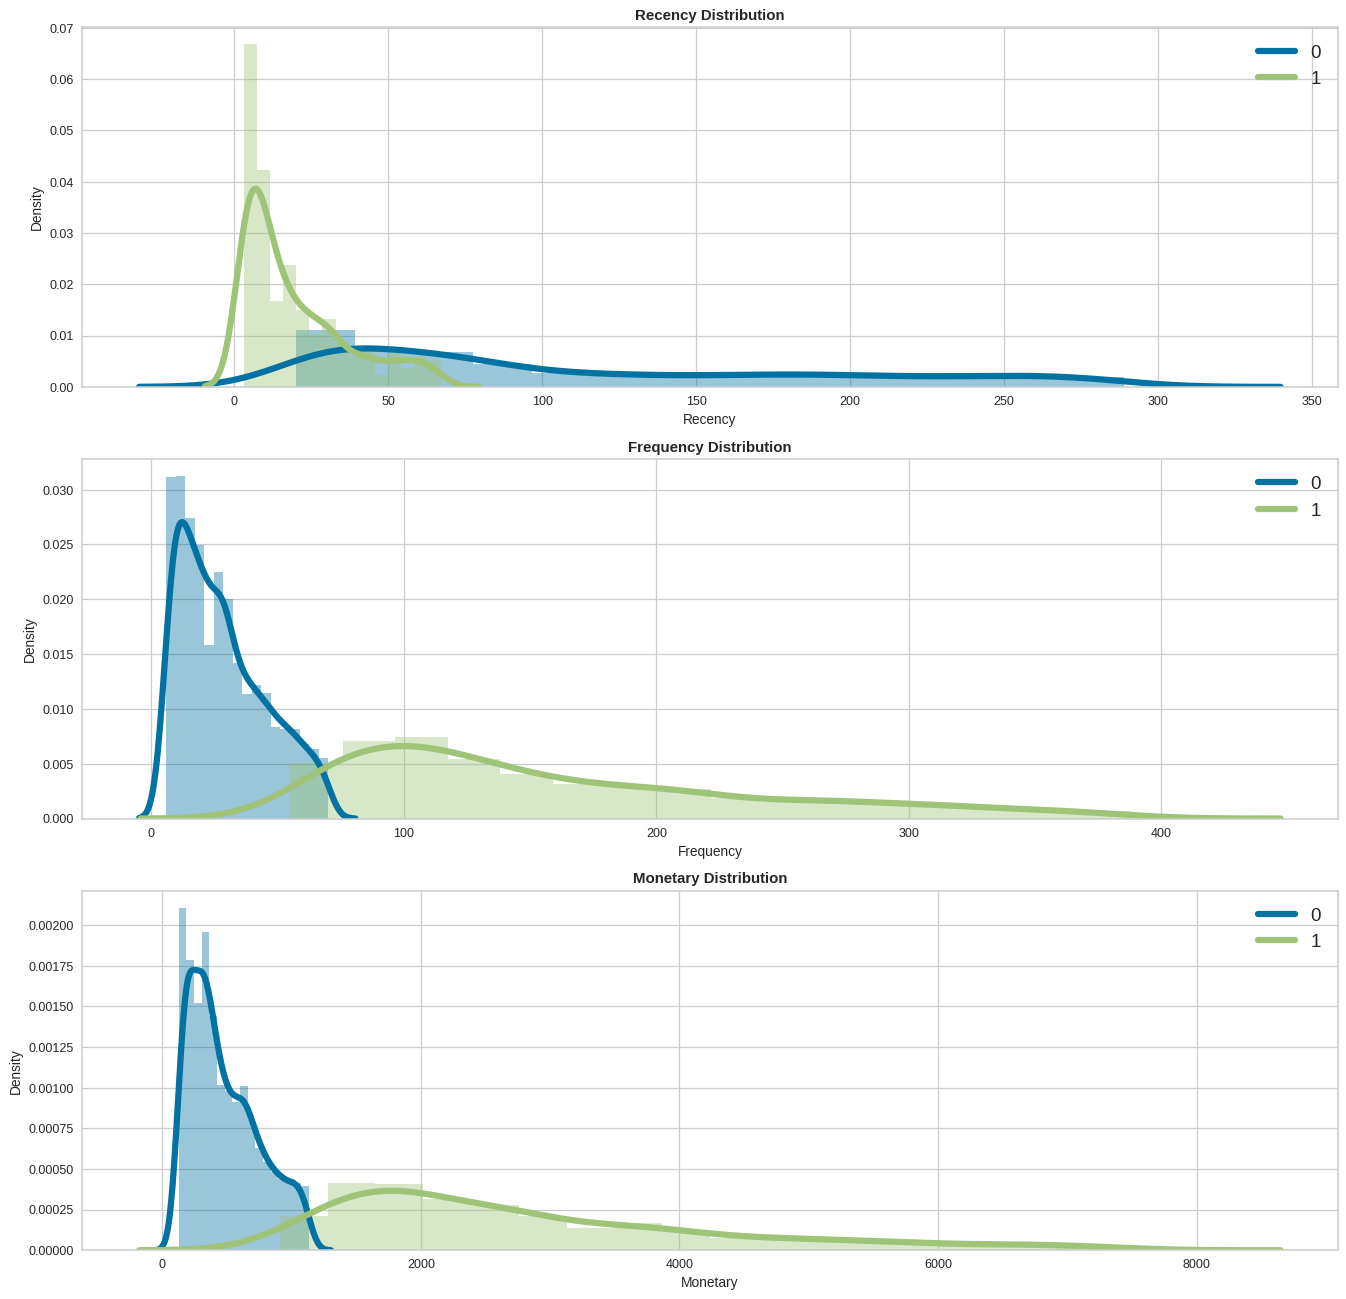



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [57]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold=70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')   # Initializing the model
y = ahc.fit_predict(X)                                                              # Fitting and predicting model

# Lets visualize the clusters with n_clusters=2
title = 'hierarchical Clustering (threshold=70)'                                   # setting the title
segment_name = 'hierarchical|2Clusters'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

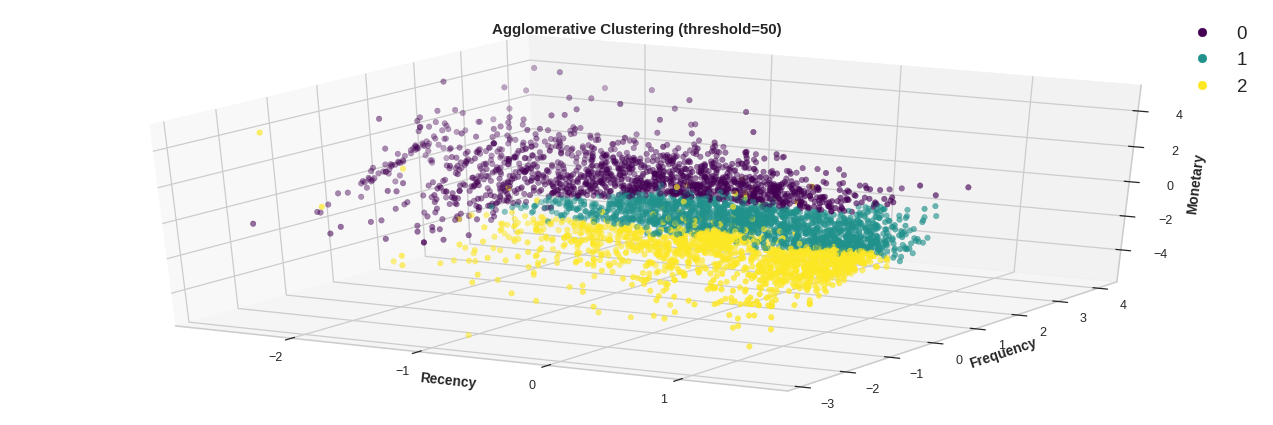

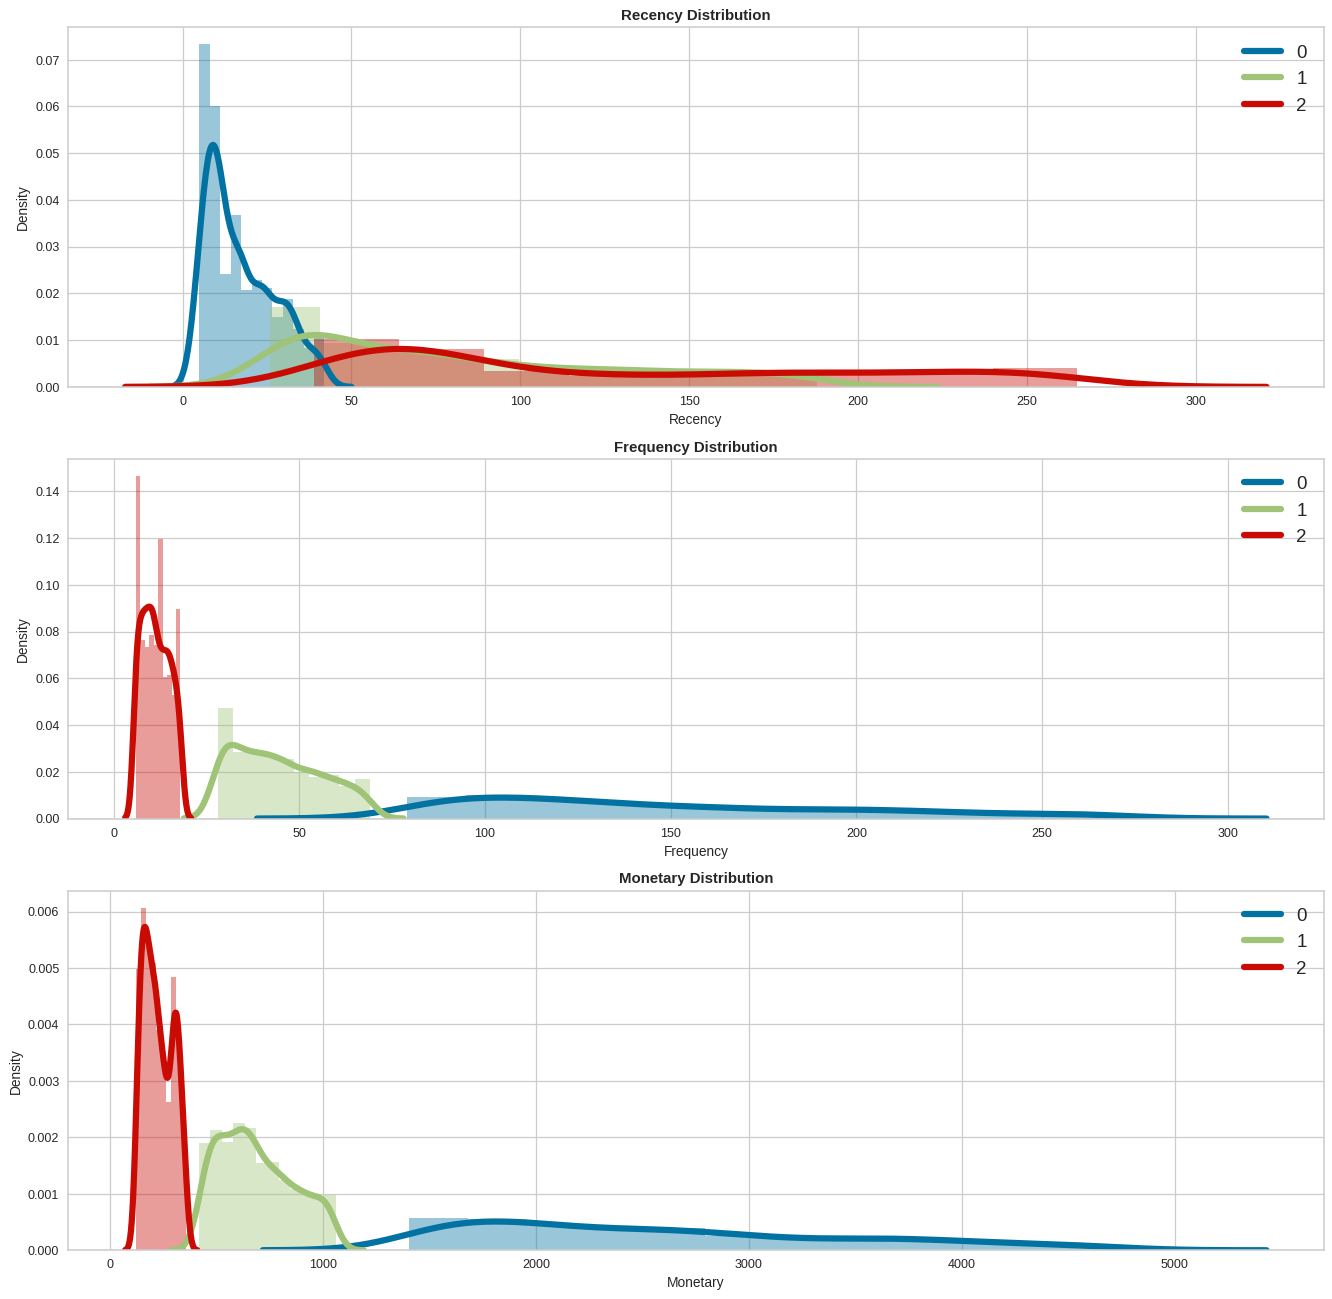



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [58]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold=50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   # Initializing the model
y = ahc.fit_predict(X)                                                              # Fitting and predicting model

# Lets visualize the clusters with n_clusters=3
title = 'Agglomerative Clustering (threshold=50)'                                   # setting the title
segment_name = 'hierarchical|3Clusters'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

**DBScan Clusters**

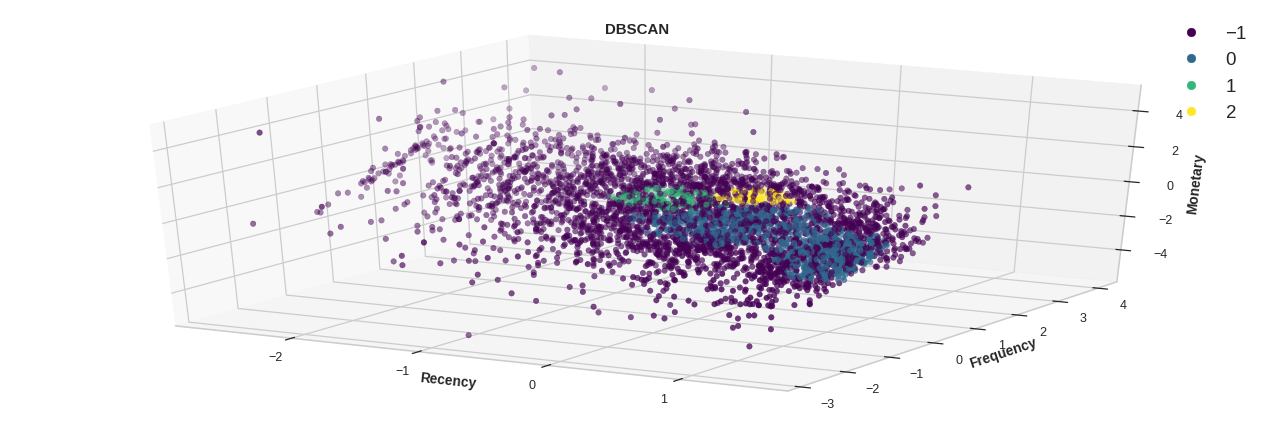

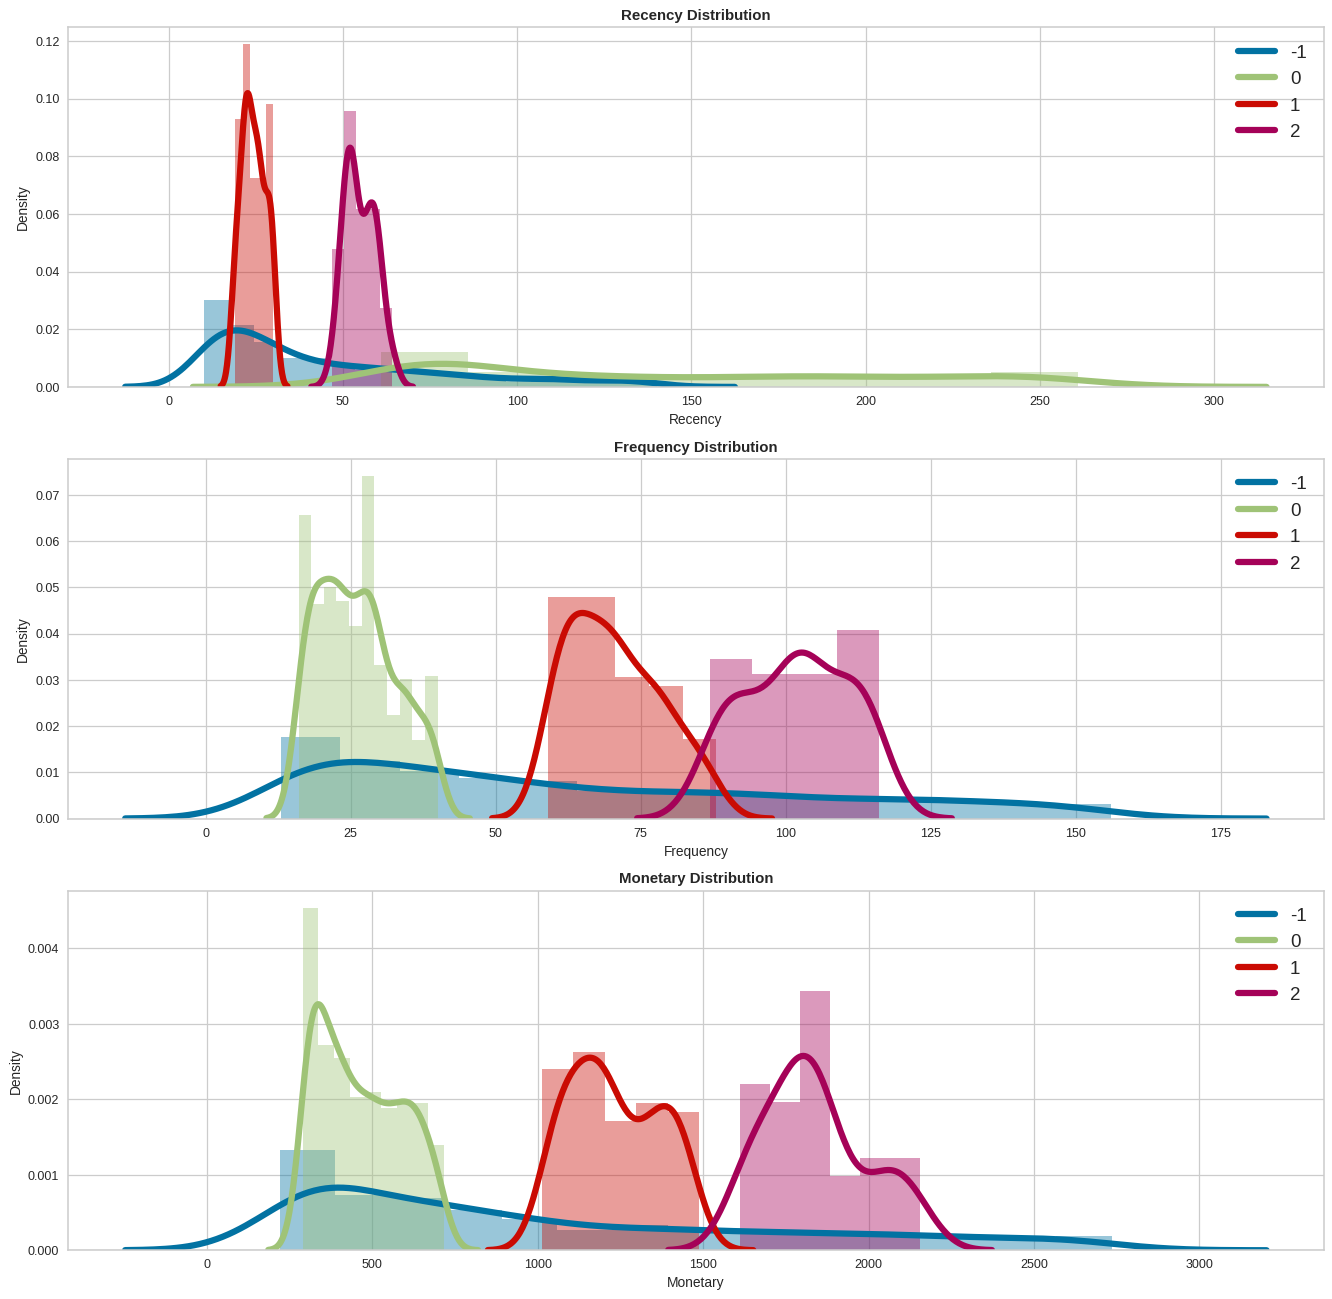



Displaying the mean median and count of Recency , Frequency and Monetary for each group with the description:



In [59]:
# Fitting DBscan Clusters
dbsc = DBSCAN(eps=0.2, min_samples=25)
y = dbsc.fit_predict(X)

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'
segment_name = 'DBSCAN'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, title, segment_name, overlap_supress)

Interpretation                                          
  1 Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.                       
  2 It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 4 clusters as shown above based on the hyperparameters defined.

# **Conclusion**                                               

  1 We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.               
  2 Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.                      
  3 We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the algorithms and the statistics extracted from the data.                                
  4 Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.

In [60]:
# Summerizing the results obtained by clusters using various method
summary = pd.DataFrame({"clusterer" : ['Binning', 'Quantile cut', 'k-means', 'k-means', 'k-means', 'Agglomerative', 'Agglormerative', 'DBScan'],
                        "criterion" : ['RFM Score Binning', 'RFM quantile Cut', 'Elbow Curve', 'silhouette Score', 'Elbow Curve & Silhouette Score',
                                       'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=0.2'],
                        "Segments" : [4,4,5,2,4,3,2,4]},
                        index = ['','','','','','','',''])
summary.T

\
clusterer            Binning      Quantile cut      k-means           k-means   
criterion  RFM Score Binning  RFM quantile Cut  Elbow Curve  silhouette Score   
Segments                   4                 4            5                 2   

                                                                               \
clusterer                         k-means     Agglomerative    Agglormerative   
criterion  Elbow Curve & Silhouette Score  Dendogram (y=70)  Dendogram (y=50)   
Segments                                4                 3                 2   

                                     
clusterer                    DBScan  
criterion  eps=0.2, min_samples=0.2  
Segments                          4

Note all the values shown are approx!

**Min and Max values are taken from 25 percentile and 75 percentile of features respectively**

# **Helper Functions**

In [61]:
# Defining a function to print to print the output in the form of MarkDown
def MarkDown(string):
  '''
    Color string : type : string
    return : MarkDown
    This function allow us to print the output in the form of MarkDown
  '''
  display(Markdown(string))

# Setting List of 5 types of customers based on activities of the customer
customers_type=["❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌❌LOST POOR CUSTOMERS❌❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌",
                '🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br>🥉🥉🥉AVERAGE CUSTOMERS🥉🥉🥉<br>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉',
                '❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<br>❤❤RECENTLY VISITED AVERAGE CUSTOMERS❤❤<br> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤',
                ' 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br> 🥈🥈🥈GOOD CUSTOMERS🥈🥈🥈 <br> 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈',
                '💓💓💓💓💓💓💓💓💓💓💓💓 <br> 💓💓💓BEST CUSTOMERS💓💓💓 <br> 💓💓💓💓💓💓💓💓💓💓💓💓',
                "❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌LOSING LOYAL CUSTOMERS❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌"]

customers_type_=["LOST POOR CUSTOMERS❌",
                'AVERAGE CUSTOMERS🥉',
                'RECENTLY VISITED AVERAGE CUSTOMERS❤',
                'GOOD CUSTOMERS🥈',
                'BEST CUSTOMERS💓',
                'LOSING LOYAL CUSTOMERS❌']


In [71]:
# Initilizing an empty dict to store rank lists
rank_list_dict = {}

# Defining a function to print the conclusion based on the summary dataframe stored in conclusion dict
def print_conclusion(segment_name):
  '''
  segment_name:Name of the clusters being passed TYPE:String
  Returns print_Conclusion of grouped customer based on clustering algorithm
  Features This functions returns the Conclusion of the grouped customers segmented from clustering algorithm 
  '''
  # Storing conclusion dataframe into variables
  dataframe = conclusion[segment_name][1]
  # Displaying conclusion dataframe
  display(dataframe.reset_index().style.set_properties(**{'text-align':'left'}).hide_index().background_gradient(cmap='plasma'))

  print(70*"__")
  print(70*"__")
  # Iterating for loop over all the segments
  for id,i in enumerate(dataframe.index):
    print("")
    MarkDown(f""" <h1><center><font size="4"> {segment_name} {i}: Customers Visited Stores around {dataframe.loc[i,'Last_visited']}, 
              has {dataframe.loc[i,'purchase_frequency']} and has {dataframe.loc[i,'Money_spent']}</font><br><font size=6>
              {customers_type[rank_list_dict[segment_name][id]]}</center></h1><br></font>""".upper())
    print(70*"__")
    print(70*"__")

# **1. Binning (4 clusters)**

In [72]:
# Defining segment name
segment_name = 'Binning'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,1,3,4]

# print the conclusion in the form of MarkDown
print_conclusion(segment_name)

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



KeyError: ignored

# **2. Quantile Cut (4 clusters)**

In [ ]:
# Defining segment name
segment_name = 'QuantileCut'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,5,3,4]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **K-means (2 clusters)**

In [ ]:
# Defining segment name
segment_name = 'k-means|2Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0, 4]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **4. k-means (4 clusters)**

In [ ]:
# Defining segment name
segment_name = 'k-means|4Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [5,4,0,2]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **5. k-means cluster (5 clusters)**

In [ ]:
# Defining segment name
segment_name = 'k-means|5Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [0,4,2,5,1]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **6. Agglomerative (2 clusters)**

In [ ]:
# Defining segment name
segment_name = 'hierarchical|2Cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [1,4]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **7. Agglomerative (3 clusters)**

In [ ]:
# Defining segment name
segment_name = 'hierarchical|3cluster'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [4,5,0]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **8. DBScan (4clusters)**

In [ ]:
# Defining segment name
segment_name = 'DBSCAN'

# Manually Rating stars for the groups of customer
rank_list_dict[segment_name] = [1,0,3,5]

# print the conclusion in the form of MarkDown
conclusion(segment_name)

# **Overall summary**

In [ ]:
# Creating Dataframe to show the segments obtianed by each method
MarkDown("#**Customer Segments Obtained From Clustering Analysis<br><br>**")
final_df = pd.DataFrame()
for segment_name in rank_list_dict:
  value = ['Yes' if j in rank_list_dict[segment_name] else 'No' for j in range(6)]
  final_df[segment_name] = pd.Series(value, index=customers_type_)
final_df.T

# **Thank You**